# CM 3005 Data Science Midterm

## Regression Analysis of Used Vehicles

Brian Van Steen, 210182781

#### Tools and libraries used in the analysis

In [1]:
import numpy as np # Python library for working with arrays
import pandas as pd # Python library for data processing, working with CSV files
import matplotlib.pyplot as plt # used for basic visualzations and graph creations
%matplotlib inline
import seaborn as sns # used for advanced visualizations and graph creations
from scipy.stats import kurtosis # to calculate kurtosis

from sklearn.model_selection import train_test_split # use for Splitting the data between training data and test data
from sklearn.linear_model import LinearRegression # for creating the Linear Regression Model
from sklearn.preprocessing import MinMaxScaler # for normalization
from sklearn.preprocessing import PolynomialFeatures # for multivariate polynomial regression
from sklearn.tree import DecisionTreeClassifier # for cross-validation
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit, cross_val_score # for cross-validation
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_regression

from sklearn.metrics import mean_squared_error # library for calculating metric
from sklearn.metrics import r2_score # library for calculating metric

import warnings
warnings.filterwarnings('ignore')

## 1. Domain-Specific Area and Objectives

A regression analysis will be conducted on market pricing of used vehicles.

The global market for producing and selling vehicles is large. In the United States, between 10 million and 17 million new vehicles are sold each year over the past 10 years. In addition, between 36 million and 42 million used vehicles are sold each year in the United States [1]. Extending this globally, more than 60 million new vehicles are sold annually, with potentially more than 150 million used vehicles sold, based on a similar ratio as in the United States.


Therefore, the market for used cars represents many vehicles in use, with the average age of vehicles being driven just over 11 years old [2]. Many businesses exist to support this industry, from the dealerships that sell new vehicles, to platforms such as Auto Trader and Kelley Blue Book. As such, the pricing of used vehicles should be predictable and transparent, based all known information, and should be ‘efficient’ for determining an accurate price [3].

From a logical perspective, used vehicles should be priced based on known facts such as the age of the vehicle, the condition of the vehicle, and how many miles or kilometers it has been driven, as well as the general supply and demand in the market. For example, due to Covid supply chains were significantly impacted, resulting in fewer new vehicles being built. With fewer new vehicles, the number of used vehicles for sale also declined while demand increased, and prices increased significantly in 2021 and 2022 [4].

But the seller's emotions can also impact pricing, either underpricing a vehicle if they need to sell quickly or overpricing a vehicle if they feel the vehicle is a premium due to low mileage or extra features.

Based on my experience of buying used vehicles, the typical first question was about the 'mileage'. Regardless of the age of the vehicle, if the mileage was too high, I would not consider it. Equally, if the mileage was low, and even if the car was an older model, I would consider it.

**To determine if accurate used vehicle prices can be predicted, I will apply linear regression to used vehicle datasets, comparing 'price' (dependent variable) with 'mileage' (the independent variable).**

**Expecting that additional variables will impact price, I will leverage multiple regression, to determine if price predictions for used vehicles can be improved.**

Using price as the dependent variable, analysis of independent variables will include:

- age
- mileage
- engine size
- emissions
- and more

[1] ‘New and used light vehicle sales in the United States from 2010 to 2022’, statista, August 2023, https://www.statista.com/statistics/183713/value-of-us-passenger-cas-sales-and-leases-since-1990/


[2] ‘What’s the average age of cars on the road?’, Hedges & Company, February 2022, https://hedgescompany.com/blog/2022/02/how-old-are-cars/


[3] ‘Efficient Market Hypothesis (EMH): Definition and Critique, Investopedia, https://www.investopedia.com/terms/e/efficientmarkethypothesis.asp



[4] ‘Used-Car prices remain high, making buying a challenge’, Consumer Reports, August 2023, https://www.consumerreports.org/cars/buying-a-car/when-to-buy-a-used-car-a6584238157/



# 2. Dataset Description

There are four datasets used for this analysis, three of which were sourced from Kaggle. The three datasets from Kaggle provide information regarding used vehicles and prices, while the fourth dataset provides additional information on vehicle features that could impact pricing.

To ensure starting from a data not in 1NF, with missing data and from several .csv files, multiple datasets were used. These datasets will be combined and cleansed during the preprocessing step.

### Dataset 1

The first dataset consists of used sales listings for 3,685 vehicles in the UK, with the list price (in £) as well as 10 additional features, and 1 feature with very sparse data with **missing values**. Of the 10 main features, there is also **missing values**.

The main index value consists of more than one value, containing both the vehichle manufacturer name as well as the vehicle type. As this column is not atomic and there is no primary key for identification, and given the missing values noted above, this dataset **represents the data not in first normal form (1NF)**.

The dataset was sourced from Kaggle, based on data extracted from autotrader.co.uk, and can be found at:

https://www.kaggle.com/datasets/muhammadawaistayyab/used-cars-prices-in-uk


In [2]:
dfUK = pd.read_csv('used_cars_UK.csv', index_col = 0)

In [3]:
dfUK.head(10)

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
5,Hyundai Coupe,800,124196,2007,3.0,Petrol,Coupe,2.0L,Manual,3.0,4.0,Euro 4,NaN
6,Ford Focus,798,140599,2008,NaN,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
7,Vauxhall Corsa,1995,90000,2009,NaN,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,NaN
8,Volvo 740,750,225318,1989,NaN,Petrol,Estate,2.3L,Automatic,5.0,NaN,NaN,NaN
9,Peugeot 207,1299,87000,2008,5.0,Diesel,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN


In [4]:
dfUK.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3685 entries, 0 to 4727
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3685 non-null   object 
 1   Price              3685 non-null   int64  
 2   Mileage(miles)     3685 non-null   int64  
 3   Registration_Year  3685 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3685 non-null   object 
 6   Body type          3685 non-null   object 
 7   Engine             3640 non-null   object 
 8   Gearbox            3685 non-null   object 
 9   Doors              3660 non-null   float64
 10  Seats              3650 non-null   float64
 11  Emission Class     3598 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 403.0+ KB


Based on a summary of the data, most of the columns have data for all 3,685 entries, while 6 columns have **missing values**.

As shown in the initial view of the data above, there are many manufacturer brands in this dataset, including Ford, Hyundai, Volvo, etc.

I will use the data from the Ford manufacturer for the multiple regression analysis.

### Dataset 2

The second dataset consists data from 100,000 used vehicle listings in the UK, scrapped from various sources. The total listings have been segmented into files based on the vehicle manufacturer.

Based on the decision from the baseline dataset, I will focus on using data for the Ford manufacturer. The Ford dataset consists of 17,965 entries, with 8 feature columns.

This dataset will complement the first dataset as the following columns are equivalent:

- Mileage
- Year / Registration Year
- Transmission / Gearbox
- Fuel Type
- Engine

The dataset was sourced from Kaggle, and can be found at:

https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes/data

In [5]:
dfFord = pd.read_csv('ford.csv')

In [6]:
dfFord.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,145,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,145,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,145,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,Diesel,145,42.2,2.0
9,Focus,2018,10000,Manual,48141,Petrol,145,61.4,1.0


In [7]:
dfFord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


Based on a summary of the data, all columns have 17,965 entries.

However, a quick look at the raw data does indicate that some columns have occurrences of **'0' values representing missing data**.

This issue will need to be dealt with during pre-processing.

### Dataset 3

The third dataset represents a compilation of data regarding vehicle features and attributes (trim), as well as the MSRP (manufacturer suggested retail price).

This dataset will be used to augment features for the multiple regression analysis.

The dataset can be found at:

https://deepvisualmarketing.github.io/

In [8]:
dfTrim = pd.read_csv('Trim_table.csv')

In [9]:
dfTrim.head(10)

,Genmodel_ID,Maker,Genmodel,Trim,Year,Price,Gas_emission,Fuel_type,Engine_size
0,2_1,Abarth,124 spider,124 Spider1.4 Turbo MultiAir 170hp 2d,2016,29365,148,Petrol,1368
1,2_1,Abarth,124 spider,124 Spider1.4 Turbo MultiAir 170hp Sequenziale...,2016,31365,153,Petrol,1368
2,2_1,Abarth,124 spider,124 Spider1.4 Turbo MultiAir 170hp 2d,2017,29365,148,Petrol,1368
3,2_1,Abarth,124 spider,124 Spider1.4 Turbo MultiAir 170hp Sequenziale...,2017,31365,153,Petrol,1368
4,2_1,Abarth,124 spider,124 SpiderScorpione 1.4 Turbo MultiAir 170hp 2d,2017,26665,148,Petrol,1368
5,2_1,Abarth,124 spider,124 Spider1.4 Turbo MultiAir 170hp 2d,2018,29365,148,Petrol,1368
6,2_1,Abarth,124 spider,124 Spider1.4 Turbo MultiAir 170hp Sequenziale...,2018,31365,153,Petrol,1368
7,2_1,Abarth,124 spider,124 SpiderGT 1.4 Turbo MultiAir 2d,2018,33365,148,Petrol,1368
8,2_1,Abarth,124 spider,124 SpiderGT 1.4 Turbo MultiAir auto 2d,2018,35365,153,Petrol,1368
9,2_1,Abarth,124 spider,124 SpiderScorpione 1.4 Turbo MultiAir 170hp 2d,2018,26665,148,Petrol,1368


Examining the highlights of the dataset, a number of the feature columns can be used to augment the existing datasets.

The 'Trim' column is not atomic and will need to be cleansed during pre-processing before it can be used to augment the existing datasets.

In [10]:
dfTrim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335562 entries, 0 to 335561
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Genmodel_ID   335562 non-null  object
 1   Maker         335562 non-null  object
 2   Genmodel      335562 non-null  object
 3   Trim          335562 non-null  object
 4   Year          335562 non-null  int64 
 5   Price         335562 non-null  int64 
 6   Gas_emission  335562 non-null  int64 
 7   Fuel_type     335562 non-null  object
 8   Engine_size   335562 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 23.0+ MB


Based on the summary of the data, there are 335,562 entries in this dataset, and all columns have all values.

Examining the raw data, there are 20,136 values for the Ford manufacturer that will be used for pre-processing and possible augmentation of the existing datasets.

### Dataset 4

The fourth dataset represents listing of used vehicles in the United States, with the list price (in US$) as well as 25 additional features.

The dataset was sourced from Kaggle, based on data scrapped from Craigslist, and can be found at:

https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

In [11]:
dfUS = pd.read_csv('vehicles.csv')

In [12]:
dfUS.tail(3) # since head() has many missing values

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,...,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


The highlights of this data are shown from the end of the dataset, as the top of the dataset has many entries with no data.

This data is from the United States, however does include data on used vehicle sales listings, including for the Ford manufacturer.

As the features are similar to the UK datasets, this data will be explored as a comparison to the multiple regression anslysis for the UK data.

In [13]:
dfUS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

Based on the summary of the data, there are more than 400,000 entries for most of the features.

As shown, many of the features have a significant amount of missing data, and not all columns will be required.

Additionally, examing the raw data there is a lot of inconsistency of the data, and significant pre-processing will be required.

However, this dataset could complement the UK multiple regression analysis, as the following columns are equivalent:

- Mileage / Odometer
- Year / Year / Registration Year
- Transmission / Transmission / Gearbox
- Fuel Type / Fuel
- Engine / Cylinders

# 3. Data Preparation

Based on the above introductions, the four datasets are imported as .csv files, and read into a DataFrame.

As highlighted in the analysis above:

- not all columns are atomic
- not all columns will be used
- there is missing data
- there is inconsistent data

### Dataset 1

An overview of the baseline dataset is shown below.

The first requirement is to convert the vehicle information ('title') column to atomic values, and then explore for missing and erroneous data.

Next, the data types will be modified, as needed, for each of the columns.

Additionally, the column headings will be modified to consistency between each of the datasets.

Finally, the Ford data will be extracted into a new DataFrame.

In [14]:
# review the DataFrame schema
dfUK.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [15]:
# create a deep copy of the initial DataFrame
dfUKfinal = dfUK.copy(deep = True)

In [16]:
# to identify just the Ford vehicles, split the 'title' column into two columns, 'Manufacturer' and 'Model'
dfUKfinal['Manufacturer'] = dfUKfinal['title'].str.split(' ', expand = True)[0]
dfUKfinal['Model'] = dfUKfinal['title'].str.split(' ', expand = True)[1]
dfUKfinal.drop(columns = ['title'], inplace = True) # drop the 'title' column

In [17]:
dfUKfinal.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Manufacturer,Model
0,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA,Fabia
1,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,Vauxhall,Corsa
2,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,Hyundai,i30
3,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI,Hatch
4,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,Vauxhall,Corsa


In [18]:
# remove all rows where the manufacturer is not Ford, and designate new DataFrame just for Ford vehicles
dfUKFord = dfUKfinal.drop(dfUKfinal[dfUKfinal.Manufacturer != "Ford"].index)

In [19]:
dfUKFord.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Manufacturer,Model
6,798,140599,2008,NaN,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,Ford,Focus
10,1495,181693,2009,NaN,Diesel,Hatchback,1.6L,Manual,3.0,5.0,Euro 4,Full,Ford,Fiesta
21,1195,101000,2010,3.0,Diesel,Hatchback,1.8L,Manual,5.0,5.0,Euro 4,NaN,Ford,Mondeo
24,990,69000,2003,3.0,Petrol,Hatchback,1.3L,Manual,3.0,4.0,Euro 3,NaN,Ford,KA
28,8975,86500,2017,NaN,Diesel,Hatchback,1.5L,Manual,5.0,5.0,Euro 6,NaN,Ford,Focus


In [20]:
# modify column heading values
dfUKFord = dfUKFord.rename(columns = {'Mileage(miles)': 'Mileage', "Registration_Year": "Year", "Previous Owners": "Owners", "Fuel type": "Fuel", "Body type": "Body", "Emission Class": "EmissionClass"})

In [21]:
dfUKFord.head()

,Price,Mileage,Year,Owners,Fuel,Body,Engine,Gearbox,Doors,Seats,EmissionClass,Service history,Manufacturer,Model
6,798,140599,2008,NaN,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,Ford,Focus
10,1495,181693,2009,NaN,Diesel,Hatchback,1.6L,Manual,3.0,5.0,Euro 4,Full,Ford,Fiesta
21,1195,101000,2010,3.0,Diesel,Hatchback,1.8L,Manual,5.0,5.0,Euro 4,NaN,Ford,Mondeo
24,990,69000,2003,3.0,Petrol,Hatchback,1.3L,Manual,3.0,4.0,Euro 3,NaN,Ford,KA
28,8975,86500,2017,NaN,Diesel,Hatchback,1.5L,Manual,5.0,5.0,Euro 6,NaN,Ford,Focus


In [22]:
dfUKFord.drop(columns = ['Manufacturer'], inplace = True) # drop the 'Manufacturer' column, since this is no longer needed

In [23]:
# review DataFrame schema just for the Ford vehicles
dfUKFord.head()

,Price,Mileage,Year,Owners,Fuel,Body,Engine,Gearbox,Doors,Seats,EmissionClass,Service history,Model
6,798,140599,2008,NaN,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,Focus
10,1495,181693,2009,NaN,Diesel,Hatchback,1.6L,Manual,3.0,5.0,Euro 4,Full,Fiesta
21,1195,101000,2010,3.0,Diesel,Hatchback,1.8L,Manual,5.0,5.0,Euro 4,NaN,Mondeo
24,990,69000,2003,3.0,Petrol,Hatchback,1.3L,Manual,3.0,4.0,Euro 3,NaN,KA
28,8975,86500,2017,NaN,Diesel,Hatchback,1.5L,Manual,5.0,5.0,Euro 6,NaN,Focus


In [24]:
dfUKFord.reset_index(drop = True, inplace = True)

In [25]:
# checking for DataFrame cells with 'NaN' as value
dfUKFord.isnull().sum()

Price                0
Mileage              0
Year                 0
Owners             162
Fuel                 0
Body                 0
Engine               2
Gearbox              0
Doors                1
Seats                1
EmissionClass        2
Service history    341
Model                0
dtype: int64

Since there are only a small number of 'NaN' values for 'Engine', 'Doors', 'Seats' and 'EmissionClass', these will be changed manually.

For 'Owners' we will replace all 'NaN' with the median value for this attribute.

For 'Service History', since this is a categorical value, and since most of the data listings are 'NaN' this attribute will be dropped.

In [26]:
# identify the 'NaN' value in the 'Seats' column
dfUKFord[dfUKFord["Seats"].isnull()]

,Price,Mileage,Year,Owners,Fuel,Body,Engine,Gearbox,Doors,Seats,EmissionClass,Service history,Model
193,2490,68837,2007,4.0,Petrol,Hatchback,NaN,Manual,NaN,NaN,NaN,Full,KA


We can see that with this entry, we can update three of the four 'NaN' values required.

As this is a 2007 KA, the 'NaN' values will be updated with values from equivalent 2007 KA vehicles.

In [27]:
# examine all entries for the vehicle model of 'KA' for 2007, to identify the applicable updates
dfUKFord.loc[((dfUKFord['Model'] == 'KA') & (dfUKFord['Year'] == 2007))]

,Price,Mileage,Year,Owners,Fuel,Body,Engine,Gearbox,Doors,Seats,EmissionClass,Service history,Model
98,1595,40000,2007,6.0,Petrol,Hatchback,1.3L,Manual,3.0,5.0,Euro 4,NaN,KA
193,2490,68837,2007,4.0,Petrol,Hatchback,NaN,Manual,NaN,NaN,NaN,Full,KA
391,995,50879,2007,3.0,Petrol,Hatchback,1.3L,Manual,3.0,5.0,Euro 4,NaN,KA


In [28]:
# update each of the 'NaN' values with the applicable values from above
dfUKFord.at[193, 'Engine'] = '1.3L'
dfUKFord.at[193, 'Doors'] = 3
dfUKFord.at[193, 'Seats'] = 5
dfUKFord.at[193, 'EmissionClass'] = 'Euro 4'

In [29]:
# confirm update to index 193
dfUKFord.iloc[193]

Price                   2490
Mileage                68837
Year                    2007
Owners                   4.0
Fuel                  Petrol
Body               Hatchback
Engine                  1.3L
Gearbox               Manual
Doors                    3.0
Seats                    5.0
EmissionClass         Euro 4
Service history         Full
Model                     KA
Name: 193, dtype: object

In [30]:
# identify the 'NaN' value in the 'Seats' column
dfUKFord[dfUKFord["Engine"].isnull()]

,Price,Mileage,Year,Owners,Fuel,Body,Engine,Gearbox,Doors,Seats,EmissionClass,Service history,Model
165,1895,109000,2009,NaN,Petrol,Hatchback,NaN,Manual,5.0,5.0,NaN,NaN,Focus


In [31]:
# examine all entries for the vehicle model of 'Focus' for 2009, to identify the applicable updates
dfUKFord.loc[((dfUKFord['Model'] == 'Focus') & (dfUKFord['Year'] == 2009))]

,Price,Mileage,Year,Owners,Fuel,Body,Engine,Gearbox,Doors,Seats,EmissionClass,Service history,Model
5,1200,95000,2009,3.0,Diesel,Hatchback,1.8L,Manual,5.0,5.0,Euro 4,NaN,Focus
7,2249,99000,2009,NaN,Petrol,Hatchback,1.8L,Manual,5.0,5.0,Euro 4,NaN,Focus
31,2395,109000,2009,NaN,Petrol,Hatchback,1.8L,Manual,5.0,5.0,Euro 4,NaN,Focus
102,2100,90207,2009,3.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,Focus
135,1799,126000,2009,NaN,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,Focus
165,1895,109000,2009,NaN,Petrol,Hatchback,NaN,Manual,5.0,5.0,NaN,NaN,Focus
175,2395,93600,2009,3.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,Focus
268,2275,100969,2009,5.0,Diesel,Hatchback,2.0L,Manual,5.0,5.0,Euro 4,NaN,Focus


In [32]:
# update each of the 'NaN' values with the applicable value for 'EmissionClass', and arbitrarily choosing 1.6L
dfUKFord.at[165, 'Engine'] = '1.6L'
dfUKFord.at[165, 'EmissionClass'] = 'Euro 4'

In [33]:
# confirm update to index 165
dfUKFord.iloc[165]

Price                   1895
Mileage               109000
Year                    2009
Owners                   NaN
Fuel                  Petrol
Body               Hatchback
Engine                  1.6L
Gearbox               Manual
Doors                    5.0
Seats                    5.0
EmissionClass         Euro 4
Service history          NaN
Model                  Focus
Name: 165, dtype: object

In [34]:
# check on mode for the 'Owners' column
dfUKFord.mode()['Owners'][0]

2.0

In [35]:
# update 'Owners' column replacing NaN with mode of 2
dfUKFord['Owners'].fillna(2, inplace = True)

In [36]:
# lastly, drop the 'Service history' column since there are too many NaN values
dfUKFord.drop(['Service history'], axis = 1, inplace = True) # drop the 'title' column

In [37]:
# checking for DataFrame cells with 'NaN' as value
dfUKFord.isnull().sum()

Price            0
Mileage          0
Year             0
Owners           0
Fuel             0
Body             0
Engine           0
Gearbox          0
Doors            0
Seats            0
EmissionClass    0
Model            0
dtype: int64

In [38]:
# for 'Engine' the 'L' will be removed for all entires
dfUKFord['Engine'] = dfUKFord['Engine'].str.replace('L', '')

In [39]:
# from view above, all numeric columns will be changed from 'float64' to 'int64' Dtype
dfUKFord['Owners'] = dfUKFord['Owners'].astype('int64')
dfUKFord['Doors'] = dfUKFord['Doors'].astype('int64')
dfUKFord['Seats'] = dfUKFord['Seats'].astype('int64')
dfUKFord['Engine'] = dfUKFord['Engine'].astype('float64')

In [40]:
# final check for the dataset of all having same entries and appropriate dtypes
dfUKFord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          410 non-null    int64  
 1   Mileage        410 non-null    int64  
 2   Year           410 non-null    int64  
 3   Owners         410 non-null    int64  
 4   Fuel           410 non-null    object 
 5   Body           410 non-null    object 
 6   Engine         410 non-null    float64
 7   Gearbox        410 non-null    object 
 8   Doors          410 non-null    int64  
 9   Seats          410 non-null    int64  
 10  EmissionClass  410 non-null    object 
 11  Model          410 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.6+ KB


In [41]:
# re-arrange columns to better view
cols = ['Price', 'Model', 'Year', 'Mileage', 'Owners', 'Body', 'Engine', 'Gearbox', 'Doors', 'Seats', 'Fuel', 'EmissionClass']
dfUKFord = dfUKFord[cols]

In [42]:
# a final check of the data
dfUKFord.head()

,Price,Model,Year,Mileage,Owners,Body,Engine,Gearbox,Doors,Seats,Fuel,EmissionClass
0,798,Focus,2008,140599,2,Hatchback,1.6,Manual,5,5,Petrol,Euro 4
1,1495,Fiesta,2009,181693,2,Hatchback,1.6,Manual,3,5,Diesel,Euro 4
2,1195,Mondeo,2010,101000,3,Hatchback,1.8,Manual,5,5,Diesel,Euro 4
3,990,KA,2003,69000,3,Hatchback,1.3,Manual,3,4,Petrol,Euro 3
4,8975,Focus,2017,86500,2,Hatchback,1.5,Manual,5,5,Diesel,Euro 6


#### Dataset 2

An overview of the baseline dataset is shown below.

Ththe data types will be modified, as needed, for each of the columns.

Additionally, the column headings will be modified to consistency between each of the datasets.

Finally, the Ford data will be extracted into a new DataFrame.

In [43]:
dfFord.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [44]:
dfFord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


This dataset is already cleansed, and so it will just be modified to augment dataset 1.

The columns will be renamed and reordered, to match dataset 1.

In [45]:
# modify column heading values to match dataset 1
dfFord = dfFord.rename(columns = {'model': 'Model', "year": "Year", "price": "Price", "transmission": "Gearbox", "mileage": "Mileage", 'fuelType': 'Fuel', 'engineSize': 'Engine'})

In [46]:
# re-arrange columns to better view
cols = ['Price', 'Model', 'Year', 'Mileage', 'Engine', 'Gearbox', 'Fuel', 'tax', 'mpg']
dfFord = dfFord[cols]

In [47]:
dfFord.head()

,Price,Model,Year,Mileage,Engine,Gearbox,Fuel,tax,mpg
0,12000,Fiesta,2017,15944,1.0,Automatic,Petrol,150,57.7
1,14000,Focus,2018,9083,1.0,Manual,Petrol,150,57.7
2,13000,Focus,2017,12456,1.0,Manual,Petrol,150,57.7
3,17500,Fiesta,2019,10460,1.5,Manual,Petrol,145,40.3
4,16500,Fiesta,2019,1482,1.0,Automatic,Petrol,145,48.7


### Dataset 3

An overview of the baseline dataset is shown below.

The data types will be modified, as needed, for each of the columns.

Additionally, the column headings will be modified to consistency between each of the datasets.

Finally, the Ford data will be extracted into a new DataFrame.

In [48]:
dfTrim.head()

,Genmodel_ID,Maker,Genmodel,Trim,Year,Price,Gas_emission,Fuel_type,Engine_size
0,2_1,Abarth,124 spider,124 Spider1.4 Turbo MultiAir 170hp 2d,2016,29365,148,Petrol,1368
1,2_1,Abarth,124 spider,124 Spider1.4 Turbo MultiAir 170hp Sequenziale...,2016,31365,153,Petrol,1368
2,2_1,Abarth,124 spider,124 Spider1.4 Turbo MultiAir 170hp 2d,2017,29365,148,Petrol,1368
3,2_1,Abarth,124 spider,124 Spider1.4 Turbo MultiAir 170hp Sequenziale...,2017,31365,153,Petrol,1368
4,2_1,Abarth,124 spider,124 SpiderScorpione 1.4 Turbo MultiAir 170hp 2d,2017,26665,148,Petrol,1368


In [49]:
# remove all rows where the manufacturer is not Ford, and designate new DataFrame just for Ford vehicles
dfTrimFord = dfTrim.drop(dfTrim[dfTrim.Maker != "Ford"].index)

In [50]:
dfTrimFord.drop(columns = ['Genmodel_ID'], inplace = True) # drop the 'Genmodel_ID' column, since this is not needed

In [51]:
dfTrimFord.reset_index(drop = True, inplace = True)

In [52]:
dfTrimFord.head()

,Maker,Genmodel,Trim,Year,Price,Gas_emission,Fuel_type,Engine_size
0,Ford,B-max,B-MAX 1.0 EcoBoost (120bhp) Titanium 5d,2012,18140,114,Petrol,998
1,Ford,B-max,B-MAX 1.0 EcoBoost (125bhp) Titanium 5d,2012,18140,114,Petrol,999
2,Ford,B-max,B-MAX 1.0 EcoBoost (125bhp) Zetec 5d,2012,16740,114,Petrol,999
3,Ford,B-max,B-MAX 1.0 EcoBoost Titanium 5d,2012,17540,119,Petrol,999
4,Ford,B-max,B-MAX 1.0 EcoBoost Zetec 5d,2012,16140,119,Petrol,999


### Dataset 4

An overview of the baseline dataset is shown below.

Ththe data types will be modified, as needed, for each of the columns.

Additionally, the column headings will be modified to consistency between each of the datasets.

Finally, the Ford data will be extracted into a new DataFrame.

In [53]:
dfUS.tail(2)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,...,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


In [54]:
dfUS.drop(columns = ['id'], inplace = True) # drop the this column, since this is not needed
dfUS.drop(columns = ['url'], inplace = True) # drop the this column, since this is not needed
dfUS.drop(columns = ['region'], inplace = True) # drop the this column, since this is not needed
dfUS.drop(columns = ['region_url'], inplace = True) # drop the this column, since this is not needed
dfUS.drop(columns = ['condition'], inplace = True) # drop the this column, since this is not needed
dfUS.drop(columns = ['title_status'], inplace = True) # drop the this column, since this is not needed
dfUS.drop(columns = ['VIN'], inplace = True) # drop the this column, since this is not needed
dfUS.drop(columns = ['paint_color'], inplace = True) # drop the this column, since this is not needed
dfUS.drop(columns = ['image_url'], inplace = True) # drop the this column, since this is not needed
dfUS.drop(columns = ['description'], inplace = True) # drop the this column, since this is not needed
dfUS.drop(columns = ['county'], inplace = True) # drop the this column, since this is not needed
dfUS.drop(columns = ['state'], inplace = True) # drop the this column, since this is not needed
dfUS.drop(columns = ['lat'], inplace = True) # drop the this column, since this is not needed
dfUS.drop(columns = ['long'], inplace = True) # drop the this column, since this is not needed
dfUS.drop(columns = ['posting_date'], inplace = True) # drop the this column, since this is not needed
dfUS.drop(columns = ['drive'], inplace = True) # drop the this column, since this is not needed
dfUS.drop(columns = ['size'], inplace = True) # drop the this column, since this is not needed
dfUS.drop(columns = ['type'], inplace = True) # drop the this column, since this is not needed

In [55]:
# to view new DataFrame
dfUS.tail()

,price,year,manufacturer,model,cylinders,fuel,odometer,transmission
426875,23590,2019.0,nissan,maxima s sedan 4d,6 cylinders,gas,32226.0,other
426876,30590,2020.0,volvo,s60 t5 momentum sedan 4d,NaN,gas,12029.0,other
426877,34990,2020.0,cadillac,xt4 sport suv 4d,NaN,diesel,4174.0,other
426878,28990,2018.0,lexus,es 350 sedan 4d,6 cylinders,gas,30112.0,other
426879,30590,2019.0,bmw,4 series 430i gran coupe,NaN,gas,22716.0,other


In [56]:
# remove all rows where the manufacturer is not Ford, and designate new DataFrame just for Ford vehicles
dfUSFord = dfUS.drop(dfUS[dfUS.manufacturer != "ford"].index)

In [57]:
# view the summary data of the DataFrame with just Ford vehicles
dfUSFord.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70985 entries, 31 to 426844
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         70985 non-null  int64  
 1   year          70985 non-null  float64
 2   manufacturer  70985 non-null  object 
 3   model         70269 non-null  object 
 4   cylinders     41860 non-null  object 
 5   fuel          70550 non-null  object 
 6   odometer      70313 non-null  float64
 7   transmission  70463 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 4.9+ MB


In [58]:
# given the large amount of data, rows with NaN values will just be dropped
dfUSFord.dropna(inplace = True)

In [59]:
dfUSFord.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40956 entries, 31 to 426813
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         40956 non-null  int64  
 1   year          40956 non-null  float64
 2   manufacturer  40956 non-null  object 
 3   model         40956 non-null  object 
 4   cylinders     40956 non-null  object 
 5   fuel          40956 non-null  object 
 6   odometer      40956 non-null  float64
 7   transmission  40956 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.8+ MB


In [60]:
dfUSFord.head()

,price,year,manufacturer,model,cylinders,fuel,odometer,transmission
31,15000,2013.0,ford,f-150 xlt,6 cylinders,gas,128000.0,automatic
47,34590,2018.0,ford,f150 super cab xl pickup 4d,6 cylinders,gas,20856.0,other
50,38990,2020.0,ford,f150 supercrew cab xlt,6 cylinders,gas,12231.0,other
55,19900,2004.0,ford,f250 super duty,8 cylinders,diesel,88000.0,automatic
57,26990,2016.0,ford,f150 regular cab xl pickup,6 cylinders,gas,14230.0,other


In [61]:
dfUSFord.drop(columns = ['manufacturer'], inplace = True) # drop the 'Manufacturer' column, since this is no longer needed

In [62]:
# modify column heading values to match dataset 1
dfUSFord = dfUSFord.rename(columns = {'price': 'Price', "year": "Year", "model": "Model", "cylinders": "Gearbox", "fuel": "Fuel", "odometer": "Mileage", "transmission": "Transmission"})

In [63]:
# re-arrange columns to better view
cols = ['Price', 'Model', 'Year', 'Mileage', 'Gearbox', 'Fuel', 'Transmission']
dfUSFord = dfUSFord[cols]

In [64]:
dfUSFord.head()

,Price,Model,Year,Mileage,Gearbox,Fuel,Transmission
31,15000,f-150 xlt,2013.0,128000.0,6 cylinders,gas,automatic
47,34590,f150 super cab xl pickup 4d,2018.0,20856.0,6 cylinders,gas,other
50,38990,f150 supercrew cab xlt,2020.0,12231.0,6 cylinders,gas,other
55,19900,f250 super duty,2004.0,88000.0,8 cylinders,diesel,automatic
57,26990,f150 regular cab xl pickup,2016.0,14230.0,6 cylinders,gas,other


In [65]:
# from view above, all numeric columns will be changed from 'float64' to 'int64' Dtype
dfUSFord['Year'] = dfUSFord['Year'].astype('int64')
dfUSFord['Mileage'] = dfUSFord['Mileage'].astype('int64')

In [66]:
# reset index to start at 0
dfUSFord.reset_index(drop = True, inplace = True)

### Summary

The four prepared datasets are listed as follows.

In [67]:
dfUKFord.head()

,Price,Model,Year,Mileage,Owners,Body,Engine,Gearbox,Doors,Seats,Fuel,EmissionClass
0,798,Focus,2008,140599,2,Hatchback,1.6,Manual,5,5,Petrol,Euro 4
1,1495,Fiesta,2009,181693,2,Hatchback,1.6,Manual,3,5,Diesel,Euro 4
2,1195,Mondeo,2010,101000,3,Hatchback,1.8,Manual,5,5,Diesel,Euro 4
3,990,KA,2003,69000,3,Hatchback,1.3,Manual,3,4,Petrol,Euro 3
4,8975,Focus,2017,86500,2,Hatchback,1.5,Manual,5,5,Diesel,Euro 6


In [68]:
dfFord.head()

,Price,Model,Year,Mileage,Engine,Gearbox,Fuel,tax,mpg
0,12000,Fiesta,2017,15944,1.0,Automatic,Petrol,150,57.7
1,14000,Focus,2018,9083,1.0,Manual,Petrol,150,57.7
2,13000,Focus,2017,12456,1.0,Manual,Petrol,150,57.7
3,17500,Fiesta,2019,10460,1.5,Manual,Petrol,145,40.3
4,16500,Fiesta,2019,1482,1.0,Automatic,Petrol,145,48.7


In [69]:
dfTrimFord.head()

,Maker,Genmodel,Trim,Year,Price,Gas_emission,Fuel_type,Engine_size
0,Ford,B-max,B-MAX 1.0 EcoBoost (120bhp) Titanium 5d,2012,18140,114,Petrol,998
1,Ford,B-max,B-MAX 1.0 EcoBoost (125bhp) Titanium 5d,2012,18140,114,Petrol,999
2,Ford,B-max,B-MAX 1.0 EcoBoost (125bhp) Zetec 5d,2012,16740,114,Petrol,999
3,Ford,B-max,B-MAX 1.0 EcoBoost Titanium 5d,2012,17540,119,Petrol,999
4,Ford,B-max,B-MAX 1.0 EcoBoost Zetec 5d,2012,16140,119,Petrol,999


In [70]:
dfUSFord.head()

,Price,Model,Year,Mileage,Gearbox,Fuel,Transmission
0,15000,f-150 xlt,2013,128000,6 cylinders,gas,automatic
1,34590,f150 super cab xl pickup 4d,2018,20856,6 cylinders,gas,other
2,38990,f150 supercrew cab xlt,2020,12231,6 cylinders,gas,other
3,19900,f250 super duty,2004,88000,8 cylinders,diesel,automatic
4,26990,f150 regular cab xl pickup,2016,14230,6 cylinders,gas,other


# 4. Statistical Analysis

### Dataset 1

### Summary Statistics

In [71]:
# statistics for all columns
dfUKFord.describe(include = 'all')

,Price,Model,Year,Mileage,Owners,Body,Engine,Gearbox,Doors,Seats,Fuel,EmissionClass
count,410.000000,410,410.000000,410.000000,410.000000,410,410.000000,410,410.000000,410.000000,410,410
unique,NaN,15,NaN,NaN,NaN,7,NaN,2,NaN,NaN,2,5
top,NaN,Focus,NaN,NaN,NaN,Hatchback,NaN,Manual,NaN,NaN,Petrol,Euro 4
freq,NaN,169,NaN,NaN,NaN,349,NaN,379,NaN,NaN,294,158
mean,4853.365854,NaN,2011.748780,86549.982927,2.421951,NaN,1.487805,NaN,4.558537,5.000000,NaN,NaN
std,3638.827945,NaN,4.536493,30091.027501,1.258713,NaN,0.362816,NaN,0.846531,0.453188,NaN,NaN
min,499.000000,NaN,1998.000000,6561.000000,1.000000,NaN,1.000000,NaN,2.000000,2.000000,NaN,NaN
25%,2125.000000,NaN,2008.000000,65000.000000,2.000000,NaN,1.300000,NaN,5.000000,5.000000,NaN,NaN
50%,3495.000000,NaN,2011.000000,89999.000000,2.000000,NaN,1.500000,NaN,5.000000,5.000000,NaN,NaN
75%,7225.000000,NaN,2015.000000,105000.000000,3.000000,NaN,1.600000,NaN,5.000000,5.000000,NaN,NaN


#### Price

For the Price dependent variable, the data show:

- 410 values
- the mean (or arithmetic average) price is 3,853.37 UK £
- the minimum price is 499 UK £
- the maximum price is 21,798 UK £
- 25% (103) of price values are less than 2,125 UK £
- 50% (205) of price values are less than 3,495 UK £
- 75% (308) of price values are less than 7,225 UK £

The standard deviation is 3,638.83 UK £, indicating a high level of spread of values compared with the mean.

In [72]:
# variance calculation
dfUKFord['Price'].var()

13241068.8144791

As shown with the standard deviation, and confirmed with the variance, there is a high level of spread between the price values.

#### Year

For the Year independent variable, the data show:

- 410 values
- the mean (or arithmetic average) is the year 2011
- the minimum year is 1998
- the maximum 2021
- 25% (103) are older than 2008
- 50% (205) are older than 2011
- 75% (308) are older than 2021

The standard deviation is 4.5 years, indicating a high level of spread of values compared with the 2011 mean.

In [73]:
# variance calculation
dfUKFord['Year'].var()

20.57976623531517

As shown with the standard deviation, and confirmed with the variance, there is a high level of spread between the years values.

#### Mileage

For the Mileage independent variable, the data show:

- 410 values
- the mean (or arithmetic average) mileage is 86,550 miles
- the minimum milesage is 6,561 miles
- the maximum mileage is 181,693 miles
- 25% (103) have less than 65,000 miles
- 50% (205) have less than 89,999 miles
- 75% (308) have less than 105,000 miles

The standard deviation is 30,091 miles, indicating a high level of spread of values compared with the 86,550 mean.

In [74]:
# variance calculation
dfUKFord['Mileage'].var()

905469936.0803924

As shown with the standard deviation, and confirmed with the variance, there is a high level of spread between the mileage values.

#### Owners

For the Owners independent variable, the data show:

- 410 values
- the mean (or arithmetic average) mileage is 2.4 owners
- the minimum milesage is 1 owners
- the maximum mileage is 8 owners
- 25% (103) of the values are 2 owners
- 50% (205) of the values are 2 owners
- 75% (308) of the values are 3 owners

The standard deviation is 1.25 owners, indicating a moderage level of spread of values compared with the 2 owners mean.

In [75]:
# variance calculation
dfUKFord['Owners'].var()

1.5843580416244263

As shown with the standard deviation, and confirmed with the variance, there is a moderate level of spread between the number of owners.

#### Engine

For the Engine size independent variable, the data show:

- 410 values
- the mean (or arithmetic average) engine size is 1.49L
- the minimum engine size is 1.0L
- the maximum engine size is 5.0L
- 25% (103) have an engine size of 1.3L or lower
- 50% (205) have an engine size of 1.5L or lower
- 75% (308) have an engine size of 1.6L or lower

The standard deviation is 0.36L, indicating a low level of spread of values compared with the 1.48L mean.

In [76]:
# variance calculation
dfUKFord['Engine'].var()

0.13163575645536407

As shown with the standard deviation, and confirmed with the variance, there is a low level of spread between the number of owners.

#### Doors

For the Doors independent variable, the data show:

- 410 values
- the mean (or arithmetic average) is 4.5 doors
- the minimum is 2 doors
- the maximum is 5 doors
- 25% (103) have 5 doors or fewer
- 50% (205) have 5 doors or fewer
- 75% (308) have 5 doors or fewer

The standard deviation is 0.85 doors, indicating a low level of spread of values compared with the 4.5 doors.

In [77]:
# variance calculation
dfUKFord['Doors'].var()

0.7166139901007813

As shown with the standard deviation, and confirmed with the variance, there is a low level of spread between the number of doors.

#### Seats

For the Seats independent variable, the data show:

- 410 values
- the mean (or arithmetic average) is 5 seats
- the minimum is 2 seats
- the maximum is 5 seats
- 25% (103) have 5 seats or fewer
- 50% (205) have 5 seats or fewer
- 75% (308) have 5 seats or fewer

The standard deviation is 0.45 seats, indicating a low level of spread of values compared with the 5 seats.

In [78]:
# variance calculation
dfUKFord['Seats'].var()

0.20537897310513448

As shown with the standard deviation, and confirmed with the variance, there is a low level of spread between the number of seats.

#### Mode

In [79]:
# mode calculation for all columns
dfUKFord.mode()

,Price,Model,Year,Mileage,Owners,Body,Engine,Gearbox,Doors,Seats,Fuel,EmissionClass
0,10970,Focus,2011,91000,2,Hatchback,1.6,Manual,5,5,Petrol,Euro 4


As shown above, the most frequent value for each column is:

- Price: 10,970 UK £
- Model: the Ford Focus
- Year: 2011
- Mileage: 91,000 miles
- Owners: 2 owners
- Body: a hatchback
- Engine: 1.6L
- Gearbox: manual transmission
- Doors: 5 (matches the body mode of hatchback)
- Seats: 5
- Fuel: petrol
- EmissionClass: Euro 4

In [80]:
# number of instances of mode value
dfUKFord['Price'].value_counts()[10970]

22

For the DataFrame, there are 22 values of the mode of 10,970 UK £, out of 410 values, or 5.4%.

In [81]:
# number of instances of mode value
dfUKFord['Model'].value_counts()['Focus']

169

For the DataFrame, there are 169 values of the mode of Ford Focus, out of 410 values, or 41.2%.

In [82]:
# number of instances of mode value
dfUKFord['Year'].value_counts()[2011]

46

For the DataFrame, there are 46 values of the mode year 2011, out of 410 values, or 11.2%.

In [83]:
# number of instances of mode value
dfUKFord['Mileage'].value_counts()[91000]

24

For the DataFrame, there are 24 values of the mode mileage of 91,000 miles out of 410 values, or 5.9%

In [84]:
# number of instances of mode value
dfUKFord['Owners'].value_counts()[2]

232

For the DataFrame, there are 232 values of the mode of 2 owners, out of 410 values, or 56.6%.

In [85]:
# number of instances of mode value
dfUKFord['Body'].value_counts()['Hatchback']

349

For the DataFrame, there are 349 values of the mode of hatchback, out of 410 values, 85.1%.

In [86]:
# number of instances of mode value
dfUKFord['Engine'].value_counts()[1.6]

115

For the DataFrame, there are 115 values of the mode of 1.6L engine, out of 410 values, 28.0%.

In [87]:
# number of instances of mode value
dfUKFord['Gearbox'].value_counts()['Manual']

379

For the DataFrame, there are 379 values of the mode of manual transmission, out of 410 values, 92.4%.

In [88]:
# number of instances of mode value
dfUKFord['Doors'].value_counts()[5]

321

For the DataFrame, there are 321 values of the mode of 5 doors, out of 410 values, 78.3%.

In [89]:
# number of instances of mode value
dfUKFord['Seats'].value_counts()[5]

378

For the DataFrame, there are 378 values of the mode of 5 seats, out of 410 values, 92.2%.

In [90]:
# number of instances of mode value
dfUKFord['Fuel'].value_counts()['Petrol']

294

For the DataFrame, there are 294 values of the mode of petrol fuel, out of 410 values, 71.7%.

In [91]:
# number of instances of mode value
dfUKFord['EmissionClass'].value_counts()['Euro 4']

158

For the DataFrame, there are 158 values of the mode of Euro 4 emission class, out of 410 values, 38.5%.

### Distribution

In [92]:
dfUKFord.head(1)

,Price,Model,Year,Mileage,Owners,Body,Engine,Gearbox,Doors,Seats,Fuel,EmissionClass
0,798,Focus,2008,140599,2,Hatchback,1.6,Manual,5,5,Petrol,Euro 4


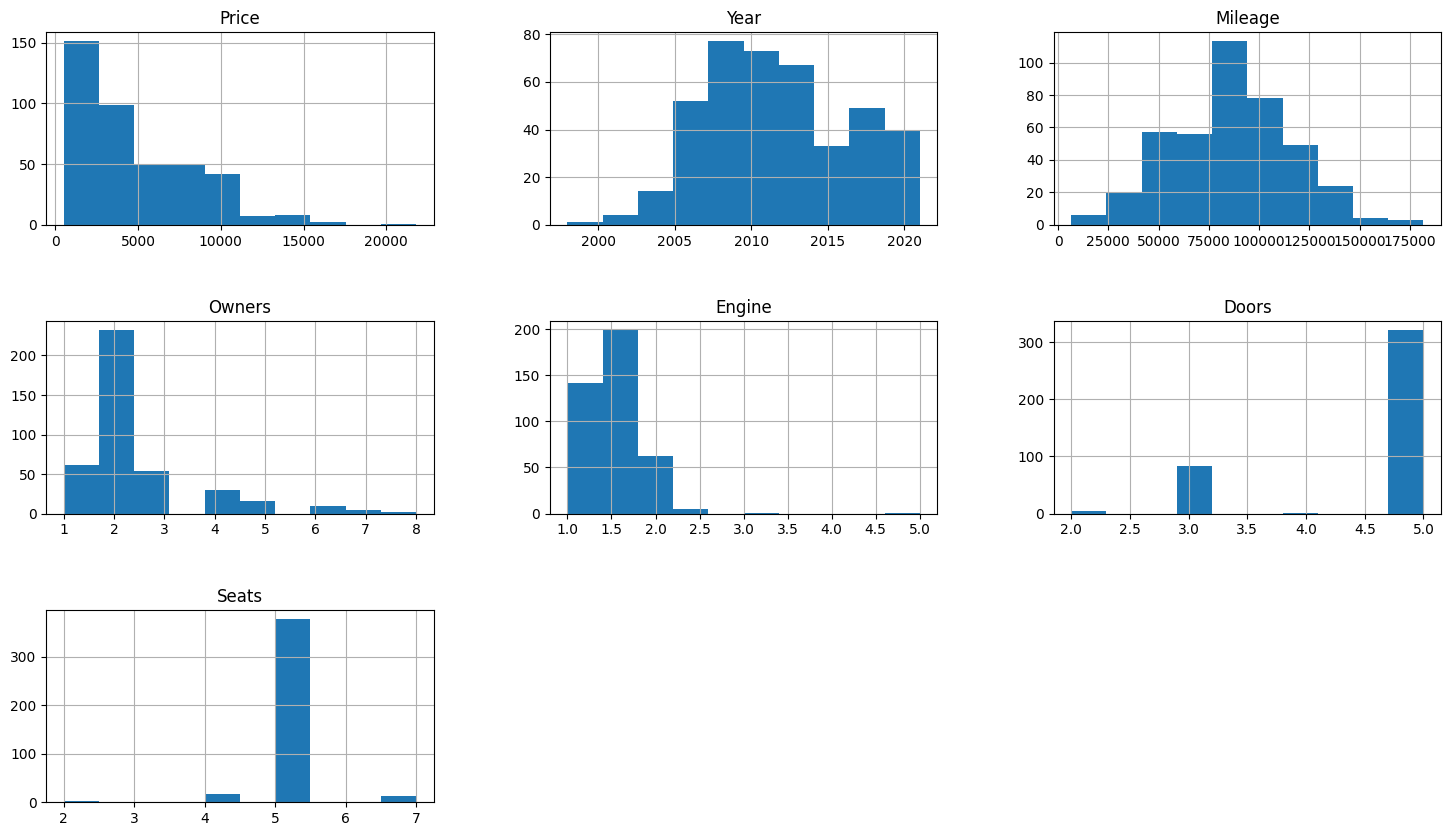

In [93]:
# print a simple set of histogram plots for the dfUKFord dataframe, for the columns with numerical values
dfUKFord.hist(figsize = (18, 10))
plt.subplots_adjust(hspace=0.5) 
plt.show()

From the histogram plots above, the distributions for these values is as follows:

- **Price** is essentially a negative exponential distribution, with significant reduction in price as the price increase
- **Year** is a binomial distribution with material right skewness
- **Mileage** is a binomial distribution with slight right skewness
- **Engine** is essentially a negative exponential distribution with almost all values less than 2.0, and outliers are higher values
- **Owners, Doors and Seats** are random distributions

### KDE (kernel desnity estimate) distribution

Using Seaborn, the histograms and continuous probability density curves will be plotted for each of the numerical dataframe columns.

Similar to above, the skewness of the distributions can be seen with the KDE line.

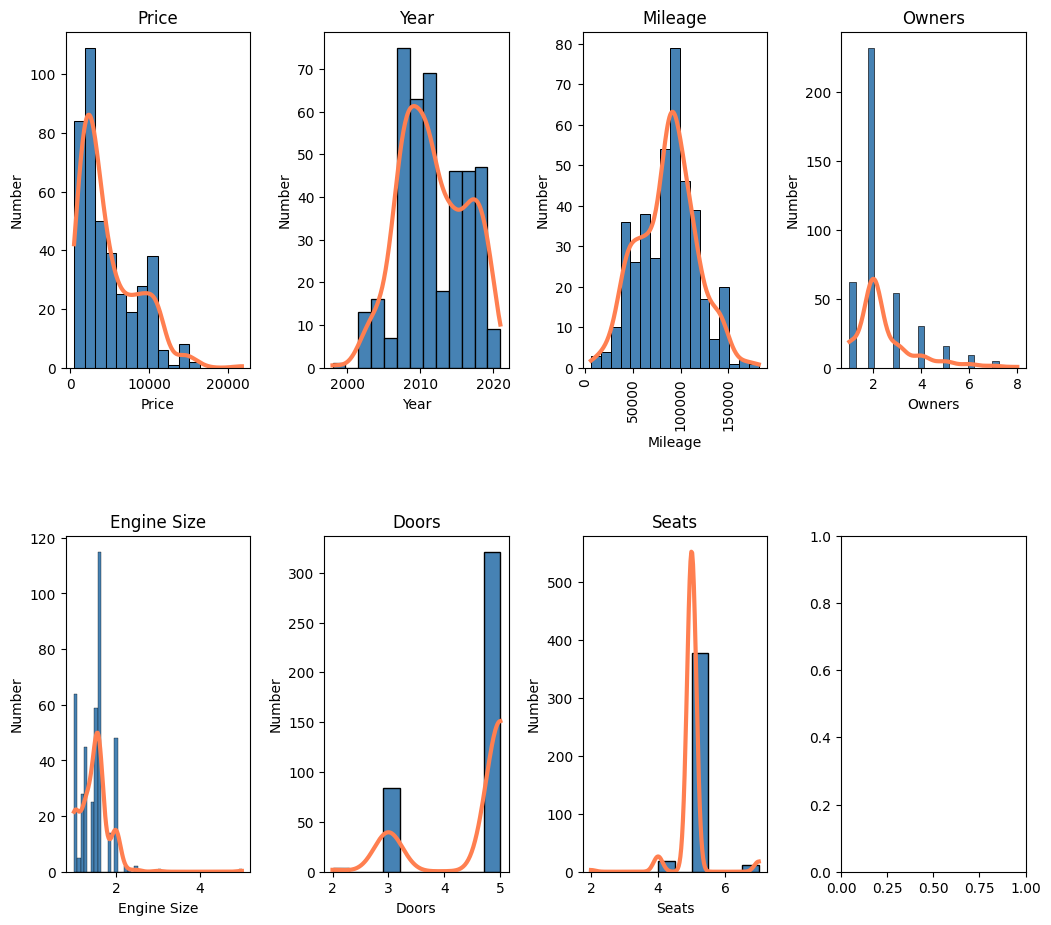

In [94]:
fig, axs = plt.subplots(2, 4, figsize=(12, 12)) # 12 histogram plots, with KDE line
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.8, wspace=0.4, hspace=0.5)

axs[0, 0].set_title("Price")
axs[0, 0].set_ylabel("Number")
axs[0, 0].set_xlabel("Price")
sns.histplot(dfUKFord.Price, ax = axs[0, 0], kde = True, facecolor = 'steelblue', color = 'coral', line_kws = {'lw': 3})

axs[0, 1].set_title("Year")
axs[0, 1].set_ylabel("Number")
axs[0, 1].set_xlabel("Year")
sns.histplot(dfUKFord.Year, ax = axs[0, 1], kde = True, facecolor = 'steelblue', color = 'coral', line_kws = {'lw': 3})

axs[0, 2].set_title("Mileage")
axs[0, 2].set_ylabel("Number")
axs[0, 2].set_xlabel("Mileage")
axs[0, 2].tick_params(axis='x', rotation=90)
sns.histplot(dfUKFord.Mileage, ax = axs[0, 2], kde = True, facecolor = 'steelblue', color = 'coral', line_kws = {'lw': 3})

axs[0, 3].set_title("Owners")
axs[0, 3].set_ylabel("Number")
axs[0, 3].set_xlabel("Owners")
sns.histplot(dfUKFord.Owners, ax = axs[0, 3], kde = True, facecolor = 'steelblue', color = 'coral', line_kws = {'lw': 3})

axs[1, 0].set_title("Engine Size")
axs[1, 0].set_ylabel("Number")
axs[1, 0].set_xlabel("Engine Size")
sns.histplot(dfUKFord.Engine, ax = axs[1, 0], kde = True, facecolor = 'steelblue', color = 'coral', line_kws = {'lw': 3})

axs[1, 1].set_title("Doors")
axs[1, 1].set_ylabel("Number")
axs[1, 1].set_xlabel("Doors")
sns.histplot(dfUKFord.Doors, ax = axs[1, 1], kde = True, facecolor = 'steelblue', color = 'coral', line_kws = {'lw': 3})

axs[1, 2].set_title("Seats")
axs[1, 2].set_ylabel("Number")
axs[1, 2].set_xlabel("Seats")
sns.histplot(dfUKFord.Seats, ax = axs[1, 2], kde = True, facecolor = 'steelblue', color = 'coral', line_kws = {'lw': 3})

plt.show()

### Skewness

In [95]:
# calculate skewness for each column
cols = ["Price", "Year", "Mileage", "Owners", "Engine", "Doors", "Seats"]
for col in cols:
    print("Skewness of " + col, dfUKFord[col].skew())

Skewness of Price 1.131431873409029
Skewness of Year 0.04550607852537432
Skewness of Mileage 0.03426792924797299
Skewness of Owners 1.7814160145388687
Skewness of Engine 2.492513481671793
Skewness of Doors -1.4481461765924135
Skewness of Seats 0.6335452807896547


Using NumPy, the skewness was calculated for each of the numerical columns.

- **Price** has significant positive skewness, with a value greater than 1
- **Year** shows an approximate symmetric distribution
- **Mileage** shows an approximate symmetric distribution
- **Owners** is has significant positive skewness, with a value greater than 1
- **Engine** is has significant positive skewness, with a value greater than 1
- **Doors** is has significant negative skewness, with a value greater than -1
- **Seats** is has moderate positive skewness, with a value between 0.5 and 1

### Kurtosis

In [96]:
# calculate Kurtosis for each column
for col in cols:
    print("Kurtosis of " + col, dfUKFord[col].kurtosis())

Kurtosis of Price 0.8911980163473241
Kurtosis of Year -0.7513633922278524
Kurtosis of Mileage -0.13187147331730031
Kurtosis of Owners 3.666832549564185
Kurtosis of Engine 21.016534651995215
Kurtosis of Doors 0.25993870185520507
Kurtosis of Seats 18.85945416250038



UsingScimPy, thekurtosiss was calculated for each of the numerical columns.- **Price** has negative kurtosis
- **Year** has negative kurtosis
- **Mileage** has negative kurtosis
- **Owners** has slightly positive kurtosis
- **Engine** has positive kurtosis
- **Doors** has negative kurtosis
- **Seats** has positive kurtosis0.5 and 1

# 5. Visualisations

In [97]:
dfUKFord.head(1)

,Price,Model,Year,Mileage,Owners,Body,Engine,Gearbox,Doors,Seats,Fuel,EmissionClass
0,798,Focus,2008,140599,2,Hatchback,1.6,Manual,5,5,Petrol,Euro 4


### Scatter Plot

Using Seaborn, 12 scatter plots are created, plotting Price (dependent variable) against all the other columns (independent variables).

The last scatter ploat is specifically for Year versus Emission Class. As the European emission standards have been increased over time, the higher numerical values represent more recent years. For example, 'Euro 6' is for vehicles starting in 2014.

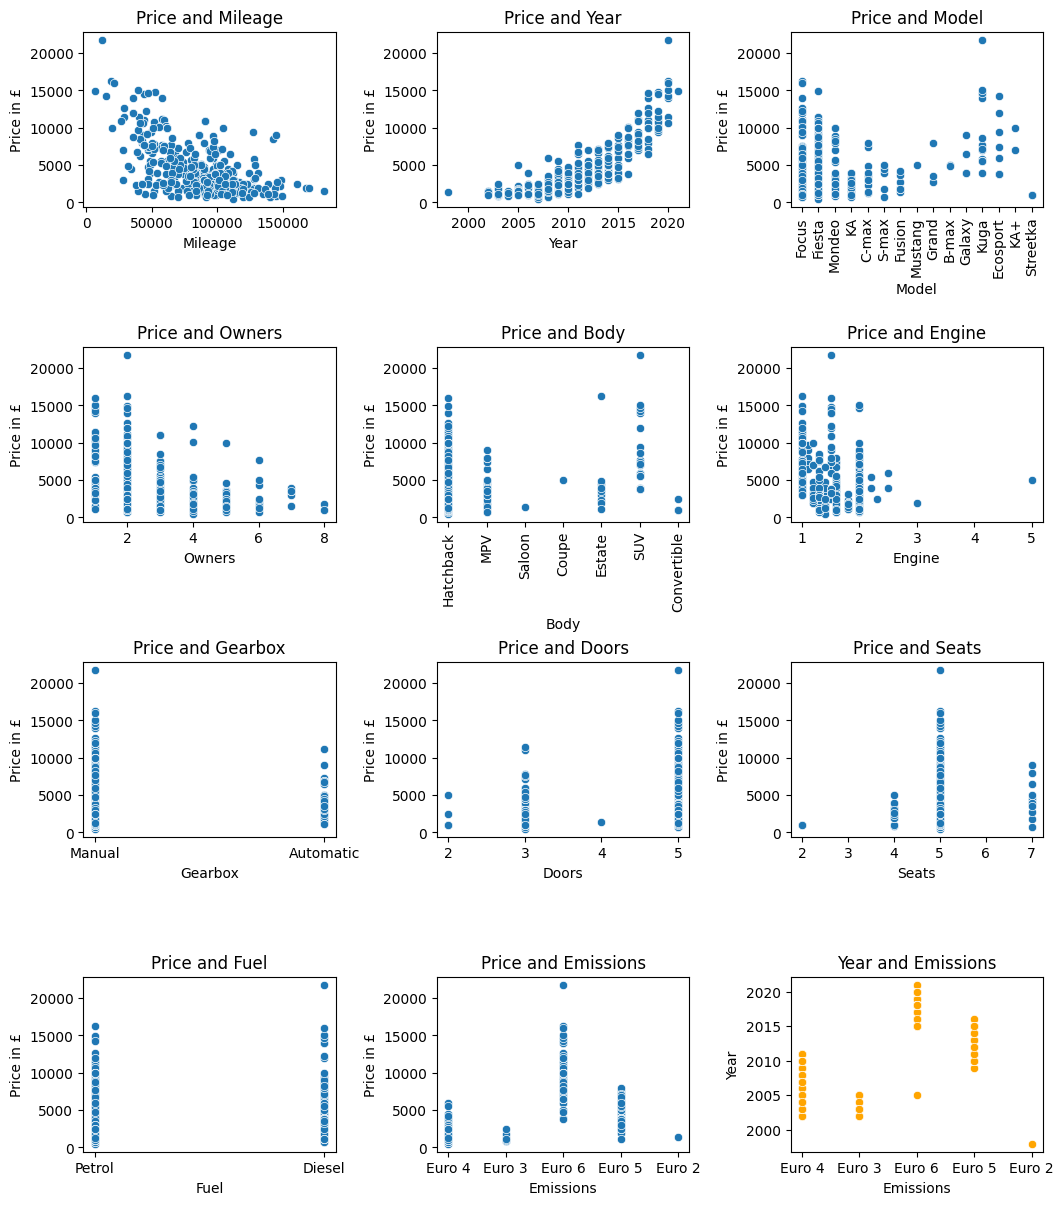

In [98]:
fig, axs = plt.subplots(4, 3, figsize=(12, 16)) # 12 scatterplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.8, wspace=0.4, hspace=0.8)

axs[0, 0].set_title('Price and Mileage')
axs[0, 0].set_ylabel("Price in £")
axs[0, 0].set_xlabel("Mileage")
sns.scatterplot(data = dfUKFord, ax = axs[0, 0], x = "Mileage", y = "Price")

axs[0, 1].set_title('Price and Year')
axs[0, 1].set_ylabel("Price in £")
axs[0, 1].set_xlabel("Year")
sns.scatterplot(data = dfUKFord, ax = axs[0, 1], x = "Year", y = "Price")

axs[0, 2].set_title("Price and Model")
axs[0, 2].set_ylabel("Price in £")
axs[0, 2].set_xlabel("Model")
axs[0, 2].tick_params(axis='x', rotation=90)
sns.scatterplot(data = dfUKFord, ax = axs[0, 2], x = "Model", y = "Price")

axs[1, 0].set_title("Price and Owners")
axs[1, 0].set_ylabel("Price in £")
axs[1, 0].set_xlabel("Owners")
sns.scatterplot(data = dfUKFord, ax = axs[1, 0], x = "Owners", y = "Price")

axs[1, 1].set_title("Price and Body")
axs[1, 1].set_ylabel("Price in £")
axs[1, 1].set_xlabel("Body")
axs[1, 1].tick_params(axis='x', rotation=90)
sns.scatterplot(data = dfUKFord, ax = axs[1, 1], x = "Body", y = "Price")

axs[1, 2].set_title("Price and Engine")
axs[1, 2].set_ylabel("Price in £")
axs[1, 2].set_xlabel("Engine")
sns.scatterplot(data = dfUKFord, ax = axs[1, 2], x = "Engine", y = "Price")

axs[2, 0].set_title("Price and Gearbox")
axs[2, 0].set_ylabel("Price in £")
axs[2, 0].set_xlabel("Gearbox")
sns.scatterplot(data = dfUKFord, ax = axs[2, 0], x = "Gearbox", y = "Price")

axs[2, 1].set_title("Price and Doors")
axs[2, 1].set_ylabel("Price in £")
axs[2, 1].set_xlabel("Doors")
sns.scatterplot(data = dfUKFord, ax = axs[2, 1], x = "Doors", y = "Price")

axs[2, 2].set_title("Price and Seats")
axs[2, 2].set_ylabel("Price in £")
axs[2, 2].set_xlabel("Seats")
sns.scatterplot(data = dfUKFord, ax = axs[2, 2], x = "Seats", y = "Price")

axs[3, 0].set_title("Price and Fuel")
axs[3, 0].set_ylabel("Price in £")
axs[3, 0].set_xlabel("Fuel")
sns.scatterplot(data = dfUKFord, ax = axs[3, 0], x = "Fuel", y = "Price")

axs[3, 1].set_title("Price and Emissions")
axs[3, 1].set_ylabel("Price in £")
axs[3, 1].set_xlabel("Emissions")
sns.scatterplot(data = dfUKFord, ax = axs[3, 1], x = "EmissionClass", y = "Price")

axs[3, 2].set_title("Year and Emissions")
axs[3, 2].set_ylabel("Year")
axs[3, 2].set_xlabel("Emissions")
sns.scatterplot(data = dfUKFord, ax = axs[3, 2], c = 'orange', x = "EmissionClass", y = "Year")

plt.show()

Examining the scatter plots above:

- **Price - Mileage** shows a distinct downward trend in prices as mileage increases, which is to be expected
- **Price - Year** shows a distinct upward trend in prices for the newer vehicles, which is to be expected
- **Price - Owners** shows a noticable downward trends in prices as the number of owners increase, highlighting a concern with buyers for the greater number of previous owners of a vehicle
- all other scatter plots do not shown any analytical trends towards pricing

Lastly, the **Year - Emissions** scatter plot shows what is expected for European emission standards and years, with the exception of a likely error for one data point. For Euro 6 there is one value ~2005, however Euro 6 only started in 2014.

### Boxplots

Boxplots are created for each of the dataframe columns, to identify:

- the median, represented by the line inside the box
- the upper quartile (74%), represented by the right-most edge of the box
- the lower quartile (25%), represented by the left-most edge of the box
- the inter-quartile range, or the IR (50% of the data points between the lower and upper quartile), represented by the box itself
- the upper whisker, represented by the right-side line, which is "the upper quartile + 1.5 of the IR"
- the lower whisker, represented by the left-side line, which is "the lower quartile + 1.5 of the IR
- anything beyond the upper whisker and the lower whisker, are outliers that are represented by circles

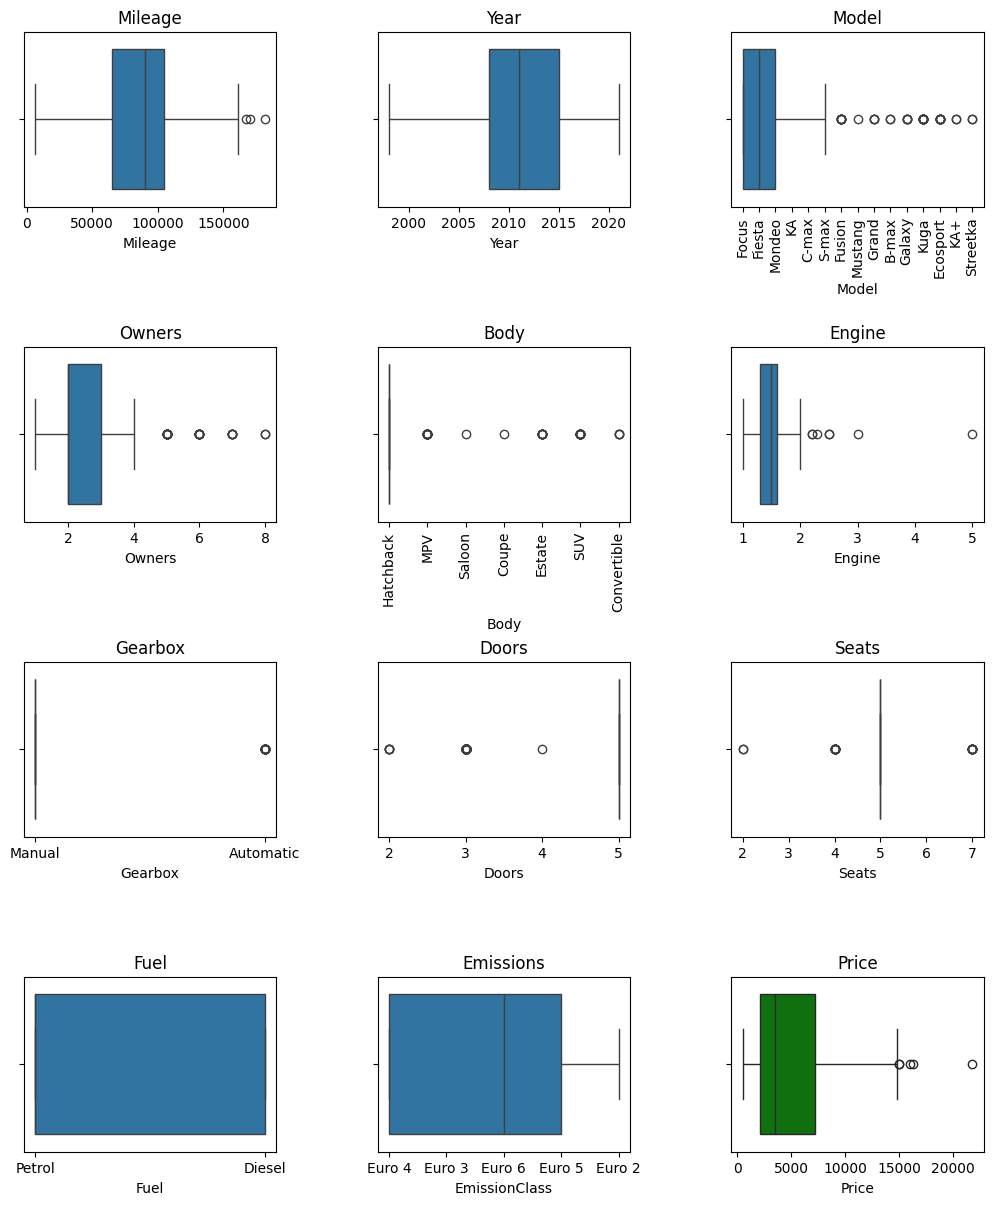

In [99]:
fig, axs = plt.subplots(4, 3, figsize=(12, 16)) # 12 boxplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.8, wspace=0.4, hspace=0.8)

axs[0, 0].set_title('Mileage') # first boxplot
sns.boxplot(data = dfUKFord, ax = axs[0, 0], x = "Mileage")

axs[0, 1].set_title('Year') # second boxplot
sns.boxplot(data = dfUKFord, ax = axs[0, 1], x = "Year")

axs[0, 2].set_title("Model") # thid boxplot
axs[0, 2].tick_params(axis='x', rotation=90)
sns.boxplot(data = dfUKFord, ax = axs[0, 2], x = "Model")

axs[1, 0].set_title("Owners") # fourth boxplot
sns.boxplot(data = dfUKFord, ax = axs[1, 0], x = "Owners")

axs[1, 1].set_title("Body") # fifth boxplot
axs[1, 1].tick_params(axis='x', rotation=90)
sns.boxplot(data = dfUKFord, ax = axs[1, 1], x = "Body")

axs[1, 2].set_title("Engine") # sixth boxplot
sns.boxplot(data = dfUKFord, ax = axs[1, 2], x = "Engine")

axs[2, 0].set_title("Gearbox") # seventh boxplot
sns.boxplot(data = dfUKFord, ax = axs[2, 0], x = "Gearbox")

axs[2, 1].set_title("Doors") # eigth boxplot
sns.boxplot(data = dfUKFord, ax = axs[2, 1], x = "Doors")

axs[2, 2].set_title("Seats") # ninth boxplot
sns.boxplot(data = dfUKFord, ax = axs[2, 2], x = "Seats")

axs[3, 0].set_title("Fuel") # tehth boxplot
sns.boxplot(data = dfUKFord, ax = axs[3, 0], x = "Fuel")

axs[3, 1].set_title("Emissions") # eleventh boxplot
sns.boxplot(data = dfUKFord, ax = axs[3, 1], x = "EmissionClass")

axs[3, 2].set_title("Price") # twelth boxplot
sns.boxplot(data = dfUKFord, ax = axs[3, 2], color = 'green', x = "Price")

plt.show()

As shown above, the box plots of all the dataframe columns, including "Price" at the end.

Of interest, these boxplots show the most popular features of Ford vehicles being driven and sold in the UK.

From a model prediction perspective:

- **Mileage** shows 50% of vehicles for sale are between ~60,000 and ~100,000 miles driven, with three outliers above ~160,000 miles
- **Year** shows 50% of vehicles for sale were registered between ~2008 and 2015, or approximately 6 - 12 years old
- **Model** shows 50% of vehicles for sale only three vehicles, the Ford Focus, Fiesta and Mondeo, and three additional vehicles representing the upper whisker, and 9 vehicles represented as outliers
- **Owners** shows 50% of vehicles for sale have 2 or 3 owners, with 4 being an upper whisker, and more than 4 being outliers
- **Body** shows that almost all vehicles for sale are hatchbacks, with all other body types being outliers
- **Engine** shows that almost all vehicles are less than 2.0L in size, with all other larger sizes being outliers
- **Gearbox** shows that almost all vehicles are manual transmission, with automatic transmission vehicles are outliers
- **Doors** shows that almost all vehicles have 5 doors (a hatchback), with fewer doors being outliers
- **Seats** shows that almost all vehicles have 5 seats, all other options being outliers

Lastly, for **Price** we can see that the median price is approximately 4,000 pounds, with the lower quartile ~2,000 pounds and the upper quartile ~7,000 pounds. The lower whisker is under 1,000 pounds, while the upper whisker is just under 15,000 pounds. There are also a handful of outliers above 15,000 pounds, which could represent expensive vehicles or vehicles being sold as 'used' but have been driven for very little miles (i.e., demonstration vehicles at new-car dealerships).

Except for **Mileage** and **Price**, all outliers will be kept for model prediction purposes, while the Mileage and Price outliers will be examined to determine if they should be removed.

Additional boxplot analysis will be done for four categories, specifically for **Price**.

To start, both **Mileage** and **Years** will be categorized into bins for clearly boxplot analysis.

In [100]:
# allocate mileage values into 9 bins
Mbins = 10
Mlabels = []
for i in range(1, Mbins):
    Mlabels.append(i)
    dfUKFord['MileageBin'] = pd.cut(dfUKFord['Mileage'], bins = i, labels = Mlabels)

In [101]:
# allocate years into 5 bins
dfUKFord['YearBin'] = pd.cut(dfUKFord['Year'], bins = 5)

In [102]:
# show updated dataframe with the mileage and year categorizations
dfUKFord.head()

,Price,Model,Year,Mileage,Owners,Body,Engine,Gearbox,Doors,Seats,Fuel,EmissionClass,MileageBin,YearBin
0,798,Focus,2008,140599,2,Hatchback,1.6,Manual,5,5,Petrol,Euro 4,7,"(2007.2, 2011.8]"
1,1495,Fiesta,2009,181693,2,Hatchback,1.6,Manual,3,5,Diesel,Euro 4,9,"(2007.2, 2011.8]"
2,1195,Mondeo,2010,101000,3,Hatchback,1.8,Manual,5,5,Diesel,Euro 4,5,"(2007.2, 2011.8]"
3,990,KA,2003,69000,3,Hatchback,1.3,Manual,3,4,Petrol,Euro 3,4,"(2002.6, 2007.2]"
4,8975,Focus,2017,86500,2,Hatchback,1.5,Manual,5,5,Diesel,Euro 6,5,"(2016.4, 2021.0]"


Generate box plot for **Mileage, Year, Model and Owners** versus **Price**, to identify outliers.

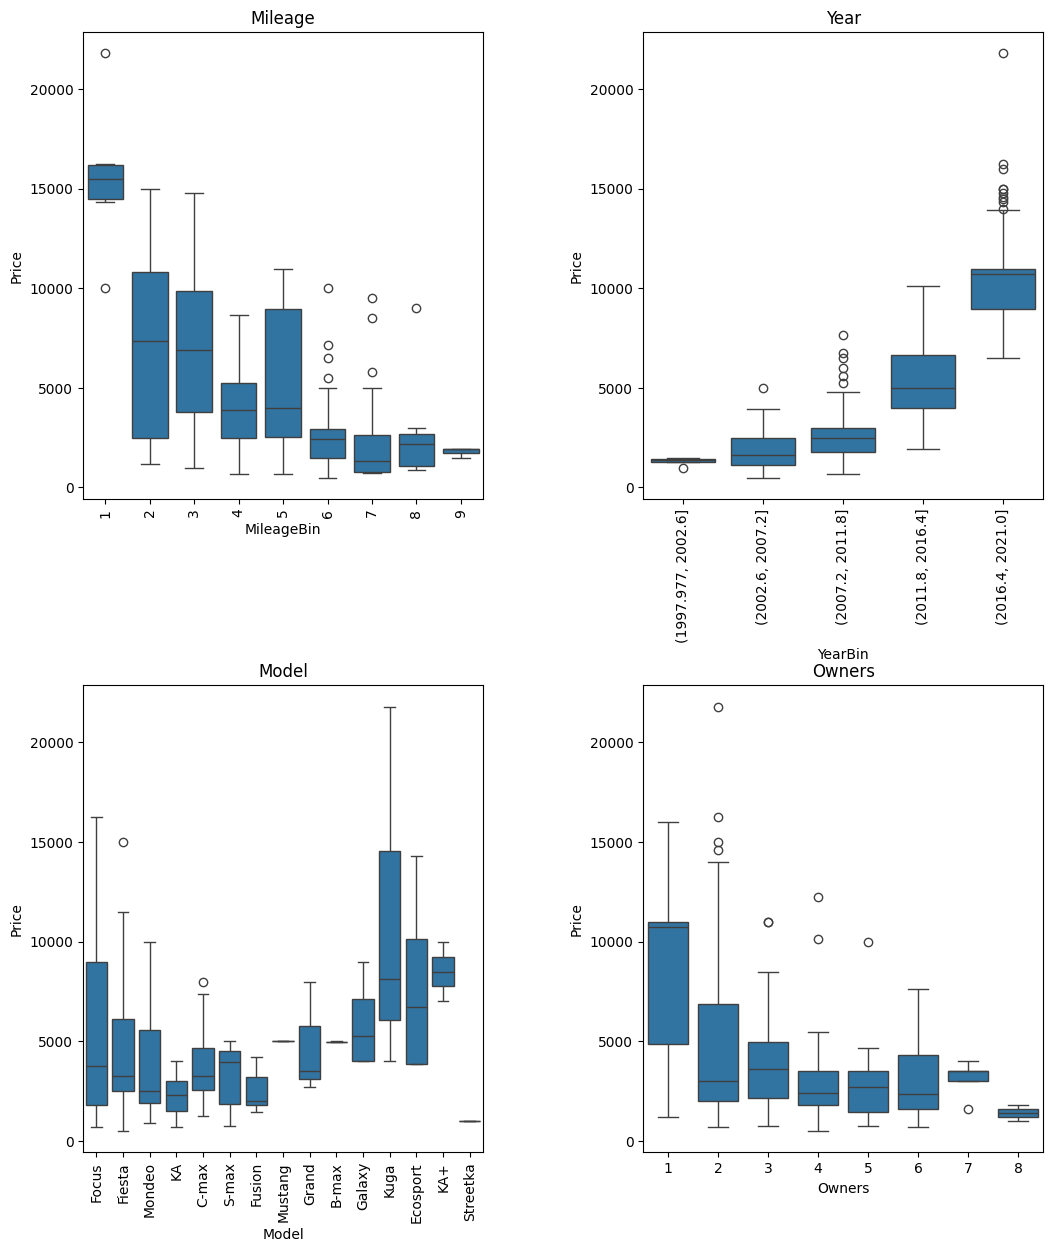

In [103]:
fig, axs = plt.subplots(2, 2, figsize=(12, 16)) # 4 boxplots with Price as Y value
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.8, wspace=0.4, hspace=0.4)

axs[0, 0].set_title('Mileage')
axs[0, 0].tick_params(axis='x', rotation=90)
sns.boxplot(data = dfUKFord, ax = axs[0, 0], x = "MileageBin", y = "Price")

axs[0, 1].set_title('Year')
axs[0, 1].tick_params(axis='x', rotation=90)
sns.boxplot(data = dfUKFord, ax = axs[0, 1], x = "YearBin", y = "Price")

axs[1, 0].set_title("Model")
axs[1, 0].tick_params(axis='x', rotation=90)
sns.boxplot(data = dfUKFord, ax = axs[1, 0], x = "Model", y = "Price")

axs[1, 1].set_title("Owners")
sns.boxplot(data = dfUKFord, ax = axs[1, 1], x = "Owners", y = "Price")

plt.show()

From the boxplots above, the trend shows the declining prices as mileage and the number of owners increase.

For age of the vehicle, the trend shows the increasing prices for newer vehicles.

Next, the handful of outliers will be examined to determine if these datapoints should be included in the model.

In [104]:
dfUKFord.loc[dfUKFord["Price"] > 20000]

,Price,Model,Year,Mileage,Owners,Body,Engine,Gearbox,Doors,Seats,Fuel,EmissionClass,MileageBin,YearBin
353,21798,Kuga,2020,12080,2,SUV,1.5,Manual,5,5,Diesel,Euro 6,1,"(2016.4, 2021.0]"


Identify all Ford Kuga vehicles, sorted by 'Year':

In [105]:
dfUKFord.loc[dfUKFord["Model"] == "Kuga"].sort_values(by = "Year")

,Price,Model,Year,Mileage,Owners,Body,Engine,Gearbox,Doors,Seats,Fuel,EmissionClass,MileageBin,YearBin
287,5600,Kuga,2009,49000,2,SUV,2.0,Manual,5,5,Diesel,Euro 4,3,"(2007.2, 2011.8]"
227,3995,Kuga,2010,124000,7,SUV,2.0,Manual,5,5,Diesel,Euro 5,7,"(2007.2, 2011.8]"
172,7646,Kuga,2011,65000,6,SUV,2.0,Manual,5,5,Diesel,Euro 5,4,"(2007.2, 2011.8]"
320,7150,Kuga,2013,103895,2,SUV,2.0,Manual,5,5,Diesel,Euro 5,6,"(2011.8, 2016.4]"
282,5790,Kuga,2014,128000,2,SUV,2.0,Manual,5,5,Diesel,Euro 5,7,"(2011.8, 2016.4]"
289,5495,Kuga,2014,105000,2,SUV,2.0,Manual,5,5,Diesel,Euro 5,6,"(2011.8, 2016.4]"
286,6990,Kuga,2015,94000,2,SUV,2.0,Manual,5,5,Diesel,Euro 6,5,"(2011.8, 2016.4]"
299,8650,Kuga,2015,65684,1,SUV,2.0,Manual,5,5,Diesel,Euro 6,4,"(2011.8, 2016.4]"
340,13995,Kuga,2018,58223,2,SUV,1.5,Manual,5,5,Diesel,Euro 6,3,"(2016.4, 2021.0]"
348,14595,Kuga,2018,47313,2,SUV,2.0,Manual,5,5,Diesel,Euro 6,3,"(2016.4, 2021.0]"


Based on the price and mileage for Ford Kuga vehicles, it seems reasonable that a 2020 vehicle with low mileage should be priced higher than 2020 and 2019 vehicles with significantly higher mileage. Of the 14 Kuga vehicles listed, this vehicle (at 12,080 miles) has a significantly lower mileage than the rest.

Therefore, this outlier will be kept for the model.

For mileage, there are also four outliers for the mileage bins 6, 7 and 8, clustered around the ~£10,000 price.

These values will be identified using the bin values (6, 7 and 8) and the price (great than ~£8,000).

In [106]:
# identify vehicles priced great than 8,000 £, in the 6 - 8 mileage bins
dfUKFord.loc[(dfUKFord["Price"] > 8000) & (dfUKFord['MileageBin'] > 5) & (dfUKFord['MileageBin'] < 9)]

,Price,Model,Year,Mileage,Owners,Body,Engine,Gearbox,Doors,Seats,Fuel,EmissionClass,MileageBin,YearBin
297,8490,Mondeo,2018,142263,3,Hatchback,2.0,Manual,5,5,Diesel,Euro 6,7,"(2016.4, 2021.0]"
311,9495,Focus,2019,127501,2,Hatchback,1.5,Manual,5,5,Diesel,Euro 6,7,"(2016.4, 2021.0]"
314,8995,Galaxy,2015,145000,2,MPV,2.0,Automatic,5,7,Diesel,Euro 6,8,"(2011.8, 2016.4]"
349,9995,Mondeo,2019,104795,2,Hatchback,2.0,Manual,5,5,Diesel,Euro 6,6,"(2016.4, 2021.0]"


For three of these vehicles (index 297, 311 and 349), these are all newer vehicles, which could justify a higher price.

Identifying all vehicles with a mileage greater than 100,000, sorted by "Year", and showing the last 10 values, shows that these are mostly older vehicles.

The full list is 128 vehicles, and of these only 5 are newer than 2016.

Therefore, these three vehicles will be retained for the model.

In [107]:
# identify vehicles with greater than 100,000 miles, sorted by year; showing last 10 values by year
dfUKFord.loc[dfUKFord["Mileage"] > 100000].sort_values(by = "Year").tail(10)

,Price,Model,Year,Mileage,Owners,Body,Engine,Gearbox,Doors,Seats,Fuel,EmissionClass,MileageBin,YearBin
314,8995,Galaxy,2015,145000,2,MPV,2.0,Automatic,5,7,Diesel,Euro 6,8,"(2011.8, 2016.4]"
400,3250,Fiesta,2015,129000,1,Hatchback,1.5,Manual,5,5,Diesel,Euro 5,7,"(2011.8, 2016.4]"
302,3130,Fiesta,2015,127910,4,Hatchback,1.5,Manual,5,5,Diesel,Euro 5,7,"(2011.8, 2016.4]"
324,4995,Fiesta,2015,102000,3,Hatchback,1.0,Manual,5,5,Petrol,Euro 6,5,"(2011.8, 2016.4]"
117,4990,B-max,2015,114850,1,MPV,1.6,Automatic,5,5,Petrol,Euro 5,6,"(2011.8, 2016.4]"
206,6999,Mondeo,2017,101100,2,Hatchback,1.5,Manual,5,5,Diesel,Euro 6,5,"(2016.4, 2021.0]"
317,6500,Fiesta,2018,109876,2,Hatchback,1.1,Manual,5,5,Petrol,Euro 6,6,"(2016.4, 2021.0]"
297,8490,Mondeo,2018,142263,3,Hatchback,2.0,Manual,5,5,Diesel,Euro 6,7,"(2016.4, 2021.0]"
349,9995,Mondeo,2019,104795,2,Hatchback,2.0,Manual,5,5,Diesel,Euro 6,6,"(2016.4, 2021.0]"
311,9495,Focus,2019,127501,2,Hatchback,1.5,Manual,5,5,Diesel,Euro 6,7,"(2016.4, 2021.0]"


For the fourth vehicle with a mileage greater than 100,000 miles and an outlier price point, this vehicle (index 314) hass an automatic transmission.

While most vehicles are manual transmission, this feature could demand a higher price.

Therefore, this vehicle will also be retained for the model.

Lastly, the outliers for the "Owners" category will be identified. These are the outliers for 2 - 5, great than ~£9,000.

As the price outliers for 2 owners is greater than ~£14,000, these will first be identified.

In [108]:
# identify vehicles priced greater than £14,000  with 2 owners
dfUKFord.loc[(dfUKFord["Price"] > 14000) & (dfUKFord['Owners'] == 2)]

,Price,Model,Year,Mileage,Owners,Body,Engine,Gearbox,Doors,Seats,Fuel,EmissionClass,MileageBin,YearBin
336,14983,Fiesta,2021,6561,2,Hatchback,1.0,Manual,5,5,Petrol,Euro 6,1,"(2016.4, 2021.0]"
338,16250,Focus,2020,19195,2,Estate,1.0,Manual,5,5,Petrol,Euro 6,1,"(2016.4, 2021.0]"
348,14595,Kuga,2018,47313,2,SUV,2.0,Manual,5,5,Diesel,Euro 6,3,"(2016.4, 2021.0]"
353,21798,Kuga,2020,12080,2,SUV,1.5,Manual,5,5,Diesel,Euro 6,1,"(2016.4, 2021.0]"


The two Kuga vehicles were previously discussed, and are being retained for the model.

The other two vehicles (index 336 and 338) are both newer vehicles and have low mileage, which should justify a higher price.

Therefore these two vehicles will also be retained for the model.

In [109]:
# identify vehicles priced greater than £9,000, with 3 - 5 owners
dfUKFord.loc[(dfUKFord["Price"] > 9000) & (dfUKFord['Owners'] > 2) & (dfUKFord['Owners'] < 6)]

,Price,Model,Year,Mileage,Owners,Body,Engine,Gearbox,Doors,Seats,Fuel,EmissionClass,MileageBin,YearBin
182,11000,Fiesta,2018,44497,3,Hatchback,1.0,Manual,5,5,Petrol,Euro 6,2,"(2016.4, 2021.0]"
237,10995,Fiesta,2017,59800,3,Hatchback,1.0,Manual,3,5,Petrol,Euro 6,3,"(2016.4, 2021.0]"
304,10136,Focus,2016,55996,4,Hatchback,1.0,Manual,5,5,Petrol,Euro 6,3,"(2011.8, 2016.4]"
330,9999,KA+,2018,19455,5,Hatchback,1.2,Manual,5,5,Petrol,Euro 6,1,"(2016.4, 2021.0]"
346,12250,Focus,2019,45798,4,Hatchback,1.5,Manual,5,5,Diesel,Euro 6,3,"(2016.4, 2021.0]"


In [110]:
# identify vehicles with price greater than £9,000 and less than £13,000, for mileage between 10,000 and 70,000 miles, and more than 1 owner
dfUKFord.loc[(dfUKFord["Price"] > 9000) & (dfUKFord["Price"] < 13000) & (dfUKFord["Mileage"] > 10000) & (dfUKFord["Mileage"] < 70000) & (dfUKFord["Owners"] > 1)].sort_values("Mileage")

,Price,Model,Year,Mileage,Owners,Body,Engine,Gearbox,Doors,Seats,Fuel,EmissionClass,MileageBin,YearBin
330,9999,KA+,2018,19455,5,Hatchback,1.2,Manual,5,5,Petrol,Euro 6,1,"(2016.4, 2021.0]"
356,10883,Fiesta,2017,26451,2,Hatchback,1.0,Manual,5,5,Petrol,Euro 6,2,"(2016.4, 2021.0]"
89,12599,Focus,2018,29000,2,Hatchback,1.0,Manual,5,5,Petrol,Euro 6,2,"(2016.4, 2021.0]"
352,11990,Ecosport,2018,36046,2,SUV,1.0,Manual,5,5,Petrol,Euro 6,2,"(2016.4, 2021.0]"
341,11995,Focus,2017,36132,2,Hatchback,1.5,Manual,5,5,Diesel,Euro 6,2,"(2016.4, 2021.0]"
226,10640,Fiesta,2018,43456,2,Hatchback,1.0,Manual,5,5,Petrol,Euro 6,2,"(2016.4, 2021.0]"
182,11000,Fiesta,2018,44497,3,Hatchback,1.0,Manual,5,5,Petrol,Euro 6,2,"(2016.4, 2021.0]"
346,12250,Focus,2019,45798,4,Hatchback,1.5,Manual,5,5,Diesel,Euro 6,3,"(2016.4, 2021.0]"
318,9195,Fiesta,2017,46435,2,Hatchback,1.0,Manual,5,5,Petrol,Euro 6,3,"(2016.4, 2021.0]"
294,9495,Ecosport,2017,49482,2,SUV,1.0,Manual,5,5,Petrol,Euro 6,3,"(2016.4, 2021.0]"


For the five outliers listed above, these are compared with mileage, year and price values, for similar vehicles.

Based on the above table, each of these five are definitely higher outliers than comparable vehicles.

However, the price delta does not seem extreme, and so these outliers will be retained for the model.

### Duplicates

Next, the dataframe will be checked for duplicates, and all duplicates (for all column values) will be dropped, retaining only the first idem.

In [111]:
# identify the duplicated rows
dupRows = dfUKFord[dfUKFord.duplicated()]
dupRows

,Price,Model,Year,Mileage,Owners,Body,Engine,Gearbox,Doors,Seats,Fuel,EmissionClass,MileageBin,YearBin
16,798,Focus,2008,140599,2,Hatchback,1.6,Manual,5,5,Petrol,Euro 4,7,"(2007.2, 2011.8]"
17,2950,Focus,2011,105000,2,Hatchback,1.6,Manual,5,5,Petrol,Euro 5,6,"(2007.2, 2011.8]"
27,8975,Focus,2017,86500,2,Hatchback,1.5,Manual,5,5,Diesel,Euro 6,5,"(2016.4, 2021.0]"
29,798,Focus,2008,140599,2,Hatchback,1.6,Manual,5,5,Petrol,Euro 4,7,"(2007.2, 2011.8]"
30,8975,Focus,2017,86500,2,Hatchback,1.5,Manual,5,5,Diesel,Euro 6,5,"(2016.4, 2021.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,3850,Ecosport,2014,98000,3,SUV,1.5,Manual,5,5,Diesel,Euro 5,5,"(2011.8, 2016.4]"
385,3850,Ecosport,2014,98000,3,SUV,1.5,Manual,5,5,Diesel,Euro 5,5,"(2011.8, 2016.4]"
386,9990,Fiesta,2018,61981,2,Hatchback,1.0,Manual,5,5,Petrol,Euro 6,3,"(2016.4, 2021.0]"
389,9990,Fiesta,2018,61981,2,Hatchback,1.0,Manual,5,5,Petrol,Euro 6,3,"(2016.4, 2021.0]"


In [112]:
# drop duplicated rows keeping the first instance, for the existing dataframe; ignore_index = True, to reset the index values starting with 0
dfUKFord.drop_duplicates(keep = 'first', ignore_index = True, inplace = True)

In [113]:
dfUKFord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Price          322 non-null    int64   
 1   Model          322 non-null    object  
 2   Year           322 non-null    int64   
 3   Mileage        322 non-null    int64   
 4   Owners         322 non-null    int64   
 5   Body           322 non-null    object  
 6   Engine         322 non-null    float64 
 7   Gearbox        322 non-null    object  
 8   Doors          322 non-null    int64   
 9   Seats          322 non-null    int64   
 10  Fuel           322 non-null    object  
 11  EmissionClass  322 non-null    object  
 12  MileageBin     322 non-null    category
 13  YearBin        322 non-null    category
dtypes: category(2), float64(1), int64(6), object(5)
memory usage: 31.6+ KB


As shown above, there are actually 88 duplicated values.

This reduces the dataset significantly, from 410 to 322.

### Peason Correlation Coefficient

Finally, the Peason correlation coefficients will be calculated for the four numerical values that showed correction in the scatter plots and the boxplots.

In [114]:
# calculate Peason correlation coefficient for Price, Year, Mileage and Owners
pearsoncorr = dfUKFord[["Price", "Year", "Mileage", "Owners"]].corr(method='pearson')
pearsoncorr

,Price,Year,Mileage,Owners
Price,1.000000,0.841275,-0.567711,-0.295625
Year,0.841275,1.000000,-0.384044,-0.258652
Mileage,-0.567711,-0.384044,1.000000,0.179517
Owners,-0.295625,-0.258652,0.179517,1.000000


In [115]:
# Pearson correlation is best used with continuous data as we have with this dataset.
# the Kendall correlation is best suited with ordinal / ranked data, but shown here for interest.
kendallcorr = dfUKFord[["Price", "Year", "Mileage", "Owners"]].corr(method='kendall')
kendallcorr

,Price,Year,Mileage,Owners
Price,1.000000,0.727973,-0.379172,-0.247664
Year,0.727973,1.000000,-0.257030,-0.220363
Mileage,-0.379172,-0.257030,1.000000,0.152942
Owners,-0.247664,-0.220363,0.152942,1.000000


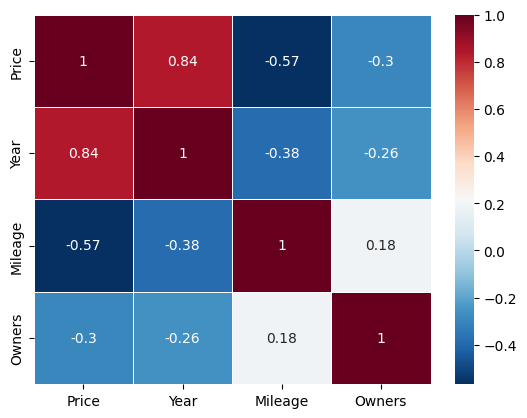

In [116]:
# visualize the correlation coefficient values from the table above
sns.heatmap(pearsoncorr, xticklabels=pearsoncorr.columns, yticklabels=pearsoncorr.columns, cmap='RdBu_r', annot=True, linewidth=0.5);

# these two steps could be combined into one, but are presented separately to detail the process
# sns.heatmap(dfUKFord[["Price", "Year", "Mileage", "Owners"]].corr(method='pearson'), xticklabels=pearsoncorr.columns, yticklabels=pearsoncorr.columns, cmap='RdBu_r', annot=True, linewidth=0.5);

As shown in the heatmap:

- **Year : Price** has a strong positive correlation of 0.84
- **Mileage : Price** has a moderate positive correlation of 0.57
- **Owners : Price** has a weak negative correlation of -0.3
- **Owners : Year, Mileage : Year, Mileage : Owners ** have a weak correlations of -0.26, -0.38 and 0.18, respectively

# 6. ML Model

### Simple Linear Regression

To start, simple linear regression models will be calculated, based on the "Price" dependent variable, and the independent variables with the greater diversity of values.

As these are just simple linear regression models to explore the data, and the results are not expected to be significant, the data will not be split between training and test.

In [117]:
# linear regression for 'Price : Mileage'
mileageRegression = LinearRegression()
mileageRegression.fit(dfUKFord[["Mileage"]], dfUKFord["Price"])
mileageRegressionScore = mileageRegression.score(dfUKFord[["Mileage"]], dfUKFord["Price"])
mileageRegressionScore

0.32229543256037285

The simple linear regression for 'Price : Mileage' shows are low r-squared value of 0.32.

Next, the scatter plot for 'Price' and 'Mileage' will be plotted, with the linear regression line.

The plot shows that the regression line generally follows the dot values, however the large vertical variability of the mileage values contributes to the low r-squared score. A curved regression line would fit the dots better.

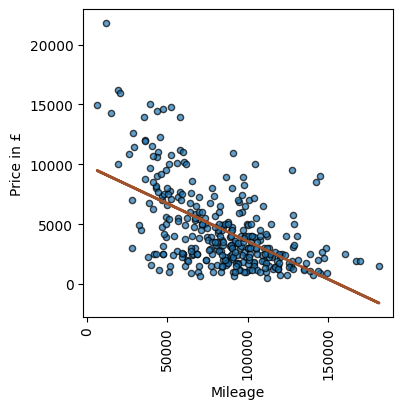

In [118]:
fig, ax = plt.subplots(figsize = (4, 4))

# scatter plot of 'Mileage' and 'Price'
ax.set_ylabel("Price in £")
ax.set_xlabel("Mileage")
ax.tick_params(axis='x', rotation=90)
ax.scatter(dfUKFord[["Mileage"]], dfUKFord["Price"], s=20, alpha=0.7, edgecolors="k")

# calculate linear regression via least squares using least squares np.polyfit, for slope (b) and intercept (a)
b, a = np.polyfit(dfUKFord["Mileage"], dfUKFord["Price"], deg = 1) # degree = 1 for linear fit

# plot regression line
ax.plot(dfUKFord["Mileage"], a + b * dfUKFord["Mileage"], color="sienna", lw=2);

In [119]:
# 2-degree polynomial regression line
polyN = PolynomialFeatures(degree = 2)
X_poly = polyN.fit_transform(dfUKFord[["Mileage"]])
mileageRegressionPoly = LinearRegression()
mileageRegressionPoly.fit(X_poly, dfUKFord["Price"])
mileageRegressionPoly = mileageRegressionPoly.score(X_poly, dfUKFord["Price"])
mileageRegressionPoly

0.4147465616247411

Using a 2-degree linear regression model shows a slightly improved r-squared value of 0.41, which is still low.

A higher value (5) for number of degrees will be used next, modifying the calculation to simplify the plotting process.

In [120]:
Xmile = dfUKFord.Mileage.to_numpy().flatten()
yPrice = dfUKFord.Price.to_numpy().flatten()
polyModelMileage = np.poly1d(np.polyfit(Xmile, yPrice, 5))

In [121]:
# the R2 score
R2PolyMileage = r2_score(yPrice, polyModelMileage(Xmile))
print(R2PolyMileage)

0.43775671927415183


The NumPy Poly1D function does not have a .score() function.

Using a 5-degree polynomial for the regression calculation slightly improves the r-squared, however it is still low.

The scatter plot and regression line will be plotted, showing the curve better fitting to the dots.

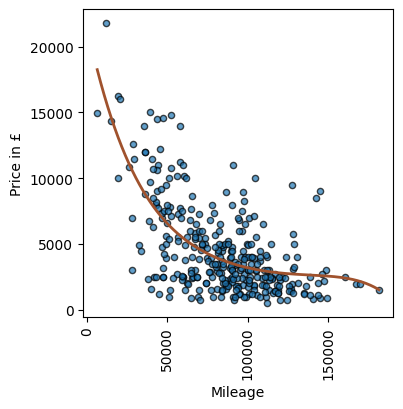

In [122]:
# scatter plot and regression line
fig, ax = plt.subplots(figsize = (4, 4))
ax.set_ylabel("Price in £")
ax.set_xlabel("Mileage")
ax.tick_params(axis='x', rotation=90)
ax.scatter(dfUKFord[["Mileage"]], dfUKFord["Price"], s=20, alpha=0.7, edgecolors="k") # scatter plot

# set X values to calculate polynomial regression line
xline = np.linspace(Xmile.min(), Xmile.max(), num=322)

# plot polynomial regression line, based on model defined above
ax.plot(xline, polyModelMileage(xline), color="sienna", lw=2);

In [123]:
# comparing predicted values from the polynomial model above, versus the actual results shows large variance
# however, the data was not split between training and text, so this is just shown for interest
dfPolyModelMileage = pd.DataFrame()
predicted = polyModelMileage(Xmile)
actual = yPrice
dfPolyModelMileage['predicted'] = predicted.tolist()
dfPolyModelMileage['actual'] = yPrice.tolist()
dfPolyModelMileage.head()

,predicted,actual
0,2621.077782,798
1,1510.817981,1495
2,3162.269464,1195
3,4675.973789,990
4,3669.719112,8975


Next, 'Year' will be used as the independent variable to calculate the regression line.

As shown below, the r-squared is significantly higher at 0.71 than for 'Mileage'.

The scatter plot and regression line is then plotted.

In [124]:
yearsRegression = LinearRegression()
yearsRegression.fit(dfUKFord[["Year"]], dfUKFord["Price"])
yearsRegressionScore = yearsRegression.score(dfUKFord[["Year"]], dfUKFord["Price"])
yearsRegressionScore

0.7077430441111723

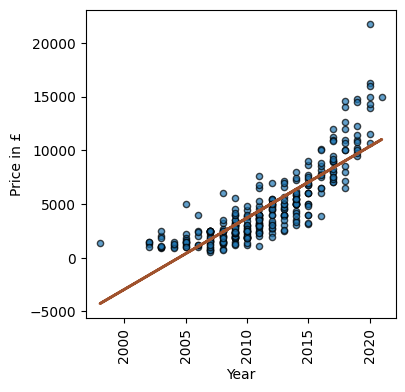

In [125]:
fig, ax = plt.subplots(figsize = (4, 4))

# scatter plot of 'Owners' and 'Price'
ax.set_ylabel("Price in £")
ax.set_xlabel("Year")
ax.tick_params(axis='x', rotation=90)
ax.scatter(dfUKFord[["Year"]], dfUKFord["Price"], s=20, alpha=0.7, edgecolors="k")

# calculate linear regression via least squares using least squares np.polyfit, for slope (b) and intercept (a)
b, a = np.polyfit(dfUKFord["Year"], dfUKFord["Price"], deg = 1) # degree = 1 for linear fit

# plot regression line
ax.plot(dfUKFord["Year"], a + b * dfUKFord["Year"], color="sienna", lw=2);

In [126]:
Xyear = dfUKFord.Year.to_numpy().flatten()
polyModelYear = np.poly1d(np.polyfit(Xyear, yPrice, 5))

Using a 5-degree polynomial for the regression calculation improves the r-squared materially.

The scatter plot and regression line will be plotted, showing the curve better fitting to the dots.

In [127]:
R2year = r2_score(yPrice, polyModelYear(Xyear))
print(R2year)

0.8408115086270351


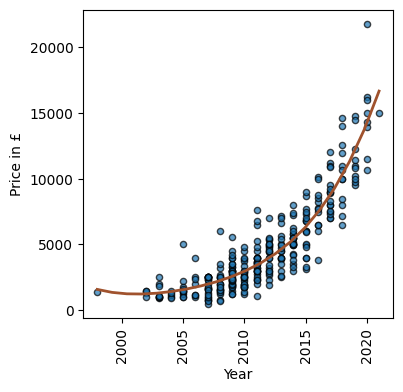

In [128]:
# scatter plot and regression line
fig, ax = plt.subplots(figsize = (4, 4))
ax.set_ylabel("Price in £")
ax.set_xlabel("Year")
ax.tick_params(axis='x', rotation=90)
ax.scatter(dfUKFord[["Year"]], dfUKFord["Price"], s=20, alpha=0.7, edgecolors="k") # scatter plot

# set X values to calculate polynomial regression line
xline = np.linspace(Xyear.min(), Xyear.max(), 20)

# plot polynomial regression line, based on model defined above
ax.plot(xline, polyModelYear(xline), color="sienna", lw=2);

In [129]:
# comparing predicted values from the polynomial regression line, versus the actual results shows large variances, but some improvement versus 'Mileage', i.e., index 4
# however, the data was not split between training and text, so this is just shown for interest
dfPolyModelYear = pd.DataFrame()
predicted = polyModelYear(Xyear)
actual = yPrice
dfPolyModelYear['predicted'] = predicted.tolist()
dfPolyModelYear['actual'] = yPrice.tolist()
dfPolyModelYear.head()

,predicted,actual
0,2241.517822,798
1,2565.076416,1495
2,2950.303101,1195
3,1303.517822,990
4,8738.318848,8975


Lastly, the number of 'Owners' will be used as the independent variable.

However, calculating the regression line shows an r-squared of 0.087, essentially indicate no correlation.

Out of curiosity, the scatter plot and regression line are plotted.

In [130]:
ownersRegression = LinearRegression()
ownersRegression.fit(dfUKFord[["Owners"]], dfUKFord["Price"])
ownersRegressionScore = ownersRegression.score(dfUKFord[["Owners"]], dfUKFord["Price"])
ownersRegressionScore

0.08739400630640592

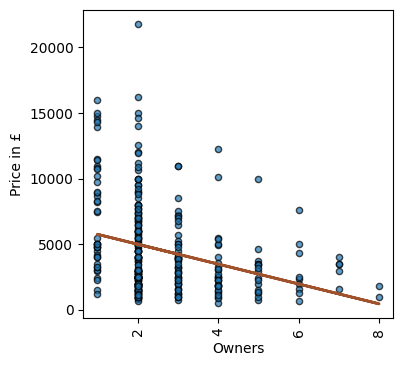

In [131]:
fig, ax = plt.subplots(figsize = (4, 4))

# scatter plot of 'Owners' and 'Price'
ax.set_ylabel("Price in £")
ax.set_xlabel("Owners")
ax.tick_params(axis='x', rotation=90)
ax.scatter(dfUKFord[["Owners"]], dfUKFord["Price"], s=20, alpha=0.7, edgecolors="k")

# calculate linear regression via least squares using least squares np.polyfit, for slope (b) and intercept (a)
b, a = np.polyfit(dfUKFord["Owners"], dfUKFord["Price"], deg = 1) # degree = 1 for linear fit

# plot regression line
ax.plot(dfUKFord["Owners"], a + b * dfUKFord["Owners"], color="sienna", lw=2);

### Multiple Regression

Regression is now conducted using all the independent variables.

To start all the categorical columns need removed from the calculations.

Additionally, the 'Price' and bin columns needed to be dropped.

The 'Price' column is the **label**.

Based on the above analysis with scatter plots and box plot, as well as the above simple linear regression, the following independent variable features will be used:

- Year, which we see from the above simple linear regression is an indicative independent variable
- Mileage, which we see from the above simple linear regression is an indicative independent variable
- Owners, which we see from the above simple linear regression has some relevance, with more owners having lower pricing

These three numerical independent variables will be evaluated first. As a second step, the following independent variable will also be evaluated. The scatter plots for these three do not show any indicative value, but will be evaluated to confirm.

- Engine
- Doors
- Seats

In [132]:
dfUKFord.head(2)

,Price,Model,Year,Mileage,Owners,Body,Engine,Gearbox,Doors,Seats,Fuel,EmissionClass,MileageBin,YearBin
0,798,Focus,2008,140599,2,Hatchback,1.6,Manual,5,5,Petrol,Euro 4,7,"(2007.2, 2011.8]"
1,1495,Fiesta,2009,181693,2,Hatchback,1.6,Manual,3,5,Diesel,Euro 4,9,"(2007.2, 2011.8]"


In [133]:
# drop Price and all independent variables except Year, Mileage and Owners; assign Price as the dependent variable / label
X = dfUKFord.drop(['Price', 'Model', 'Body', 'Engine', 'Gearbox', 'Doors', 'Seats', 'Fuel', 'EmissionClass', 'MileageBin', 'YearBin'], axis=1)
y = dfUKFord['Price']

# split the data into training and test data, with 20% allocated to test data (65)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # Hitchhiker's Guide to the Galaxy

In [134]:
modelBase = LinearRegression()
modelBase.fit(X_train, y_train)
modelBaseScore = modelBase.score(X, y)
modelBaseScore

0.7791215733158512

The multiple regression model for the three independent variables that were evaluated individually performs slightly worse than the polynomial simple regression model for 'Year'. That model has an r-squared of 0.84 while now it is 0.78.

The three additionally numerical independent variables will be added to determine if there is any change.

In [135]:
# drop Price and all categorical independent variables; assign Price as the dependent variable / label
X = dfUKFord.drop(['Price', 'Model', 'Body', 'Gearbox', 'Fuel', 'EmissionClass', 'MileageBin', 'YearBin'], axis=1)
y = dfUKFord['Price']

# split the data into training and test data, with 20% allocated to test data (65)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # Hitchhiker's Guide to the Galaxy

In [136]:
modelExpanded = LinearRegression()
modelExpanded.fit(X_train, y_train)
modelExpandedScore = modelExpanded.score(X, y)
modelExpandedScore

0.8115582206699581

The multiple regression model for the six numerical independent varialbe has improved slightly, with an r-sqared of 0.81.

As this is still not a compelling value, additional feature engineering and selection will be required.

# 7. Validation

Given the small number of values in the dataset (322), cross validation would be beneficial.

As the multiple regression model with all numerical independent variables was only slightly better than the model using 'Mileage', 'Year' and 'Owners', the cross validation process will be applied to just those three numerical independent variables.

In [137]:
X = dfUKFord.drop(['Price', 'Model', 'Body', 'Engine', 'Gearbox', 'Doors', 'Seats', 'Fuel', 'EmissionClass', 'MileageBin', 'YearBin'], axis=1)
y = dfUKFord['Price']

lr = LinearRegression()

cvSplits = [2, 3, 4, 5, 6] # number of folds

# apply KFold analysis, for the different number of splits, shuffle the data, and set a random state
for fold in cvSplits:
    folds = KFold(n_splits = fold, shuffle = True, random_state = 42) # Hitchhiker's Guide to the Galaxy

    scores = cross_val_score(lr, X, y, scoring = 'r2', cv = folds) # use r-squared for scoring

    print("Cross Validation Scores for ", fold, " splits: ", scores)
    print("Highest CV Score: ", scores.max())
    print("Number of CV Scores used: ", len(scores))


Cross Validation Scores for  2  splits:  [0.73056592 0.80836593]
Highest CV Score:  0.8083659270724959
Number of CV Scores used:  2
Cross Validation Scores for  3  splits:  [0.75273702 0.77246644 0.79835349]
Highest CV Score:  0.7983534888377422
Number of CV Scores used:  3
Cross Validation Scores for  4  splits:  [0.74487845 0.715576   0.82731041 0.79642823]
Highest CV Score:  0.827310414853677
Number of CV Scores used:  4
Cross Validation Scores for  5  splits:  [0.71232655 0.71620483 0.80634636 0.82977838 0.79467415]
Highest CV Score:  0.8297783770828084
Number of CV Scores used:  5
Cross Validation Scores for  6  splits:  [0.72909493 0.74762454 0.68320807 0.82772939 0.84195827 0.77528527]
Highest CV Score:  0.8419582744614946
Number of CV Scores used:  6


For the above K-Fold cross validation analysis, increasing numbers of folds (splits) are used to validate the model.

The model is then trained on 'k-1' folds (splits) of training set. The remaining fold (split) is then used as a validation set to evaluate the model.

As shown above, all r-squared values are above 0.71, with 6 splits having the overall highest r-squared value of 0.84. This is higher than the multiple regression model above, but still the same level as the polynomial simple linear regression using 'Year'.

Out of curiosity, the same process will be repeated, including the three numerical independent variables that were dropped, 'Engine', 'Doors', and 'Seats'.

In [138]:
X = dfUKFord.drop(['Price', 'Model', 'Body', 'Gearbox', 'Fuel', 'EmissionClass', 'MileageBin', 'YearBin'], axis=1)
y = dfUKFord['Price']

lr = LinearRegression()

cvSplits = [2, 3, 4, 5, 6]

maxKFoldScore = 0

for fold in cvSplits:
    folds = KFold(n_splits = fold, shuffle = True, random_state = 42) # Hitchhiker's Guide to the Galaxy

    scores = cross_val_score(lr, X, y, scoring = 'r2', cv = folds)
        
    print("Cross Validation Scores for ", fold, " splits: ", scores)
    print("Mean CV Score: ", scores.mean())
    print("Number of CV Scores used: ", len(scores))
    maxScore = scores.max()
    print("MaxScore: ", maxScore)
    if maxScore > maxKFoldScore:
        maxKFoldScore = maxScore
    print()

print(maxKFoldScore)

Cross Validation Scores for  2  splits:  [0.75757573 0.82456638]
Mean CV Score:  0.7910710590088874
Number of CV Scores used:  2
MaxScore:  0.8245663835786624

Cross Validation Scores for  3  splits:  [0.7662525  0.82248549 0.82872138]
Mean CV Score:  0.8058197901725661
Number of CV Scores used:  3
MaxScore:  0.8287213766618777

Cross Validation Scores for  4  splits:  [0.76606482 0.75422472 0.86660827 0.81849102]
Mean CV Score:  0.8013472074176681
Number of CV Scores used:  4
MaxScore:  0.866608270025206

Cross Validation Scores for  5  splits:  [0.71500706 0.73669602 0.86887013 0.86439691 0.81809321]
Mean CV Score:  0.8006126655503542
Number of CV Scores used:  5
MaxScore:  0.8688701273613976

Cross Validation Scores for  6  splits:  [0.73429191 0.7667314  0.7538136  0.86076676 0.85759284 0.81655949]
Mean CV Score:  0.7982926686674398
Number of CV Scores used:  6
MaxScore:  0.8607667647820246

0.8688701273613976


Overall, these r-squared values are slightly higher.

As some of the classes are inbalanced, Stratified K Fold will also be evaluated next.

In [139]:
X = dfUKFord.drop(['Price', 'Model', 'Body', 'Gearbox', 'Fuel', 'EmissionClass', 'MileageBin', 'YearBin'], axis=1)
y = dfUKFord['Price']

lr = LinearRegression()

cvSplits = [2, 3, 4, 5, 6]

maxStratKFoldScore = 0

for fold in cvSplits:
    folds = StratifiedKFold(n_splits = fold, shuffle = True, random_state = 42) # Hitchhiker's Guide to the Galaxy

    scores = cross_val_score(lr, X, y, scoring = 'r2', cv = folds)

    print("Cross Validation Scores for ", fold, " splits: ", scores)
    print("Mean CV Score: ", scores.mean())
    print("Number of CV Scores used: ", len(scores))
    maxScore = scores.max()
    print("MaxScore: ", maxScore)
    if maxScore > maxStratKFoldScore:
        maxStratKFoldScore = maxScore
    print()

print(maxStratKFoldScore)

Cross Validation Scores for  2  splits:  [0.81476561 0.79508421]
Mean CV Score:  0.804924906143307
Number of CV Scores used:  2
MaxScore:  0.8147656070312242

Cross Validation Scores for  3  splits:  [0.82844054 0.80293783 0.77708529]
Mean CV Score:  0.8028212183451805
Number of CV Scores used:  3
MaxScore:  0.828440536091111

Cross Validation Scores for  4  splits:  [0.82374583 0.82345298 0.77565536 0.80145317]
Mean CV Score:  0.8060768364472957
Number of CV Scores used:  4
MaxScore:  0.8237458332651563

Cross Validation Scores for  5  splits:  [0.78158689 0.80201652 0.80616251 0.81969814 0.81950098]
Mean CV Score:  0.8057930105034605
Number of CV Scores used:  5
MaxScore:  0.819698141839333

Cross Validation Scores for  6  splits:  [0.82701513 0.81153282 0.77574732 0.84693476 0.75784451 0.8046946 ]
Mean CV Score:  0.8039615236119463
Number of CV Scores used:  6
MaxScore:  0.8469347588011993

0.8469347588011993


The r-squared values for Stratified K-Fold are essentially equivalent to K-Fold.

Next, 'Leave-One-Out' will be evaluated.

In [140]:
X = dfUKFord.drop(['Price', 'Model', 'Body', 'Gearbox', 'Fuel', 'EmissionClass', 'MileageBin', 'YearBin'], axis=1)
y = dfUKFord['Price']

lr = LinearRegression()

crossVal = LeaveOneOut()

scores = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv = crossVal, n_jobs = -1)

print("Mean CV Score: ", scores.mean())
print("Number of CV Scores used: ", len(scores))
print()

Mean CV Score:  -1144.67126111022
Number of CV Scores used:  322



The "Leave-One-Out" score does not perform well.

Lastly, the ShuffleSplit approach will be applied, which applies a random permutation to cross-validation.

In [141]:
X = dfUKFord.drop(['Price', 'Model', 'Body', 'Gearbox', 'Fuel', 'EmissionClass', 'MileageBin', 'YearBin'], axis=1)
y = dfUKFord['Price']

lr = LinearRegression()

ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 5)

scores = cross_val_score(lr, X, y, cv = ss)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.74641976 0.8198043  0.75735279 0.79295123 0.84004784]
Average CV Score:  0.7913151871165485
Number of CV Scores used in Average:  5


# 8. Feature Engineering

### 8.1 Dataset 1

The categorical data will now be included in the multiple regression analysis.

First, **one hot encoding** is used, using Pandas 'get_dummies' function for all categorical columns. The encoding is done by default as a NumPy array (none sparse).

In [142]:
dfUKFordOneHot = pd.get_dummies(dfUKFord, columns = ["Model", "Body", "Gearbox", "Fuel", "EmissionClass"])

In [143]:
dfUKFordOneHot.head()

,Price,Year,Mileage,Owners,Engine,Doors,Seats,MileageBin,YearBin,Model_B-max,...,Body_Saloon,Gearbox_Automatic,Gearbox_Manual,Fuel_Diesel,Fuel_Petrol,EmissionClass_Euro 2,EmissionClass_Euro 3,EmissionClass_Euro 4,EmissionClass_Euro 5,EmissionClass_Euro 6
0,798,2008,140599,2,1.6,5,5,7,"(2007.2, 2011.8]",False,...,False,False,True,False,True,False,False,True,False,False
1,1495,2009,181693,2,1.6,3,5,9,"(2007.2, 2011.8]",False,...,False,False,True,True,False,False,False,True,False,False
2,1195,2010,101000,3,1.8,5,5,5,"(2007.2, 2011.8]",False,...,False,False,True,True,False,False,False,True,False,False
3,990,2003,69000,3,1.3,3,4,4,"(2002.6, 2007.2]",False,...,False,False,True,False,True,False,True,False,False,False
4,8975,2017,86500,2,1.5,5,5,5,"(2016.4, 2021.0]",False,...,False,False,True,True,False,False,False,False,False,True


In [144]:
dfUKFordOneHot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Price                 322 non-null    int64   
 1   Year                  322 non-null    int64   
 2   Mileage               322 non-null    int64   
 3   Owners                322 non-null    int64   
 4   Engine                322 non-null    float64 
 5   Doors                 322 non-null    int64   
 6   Seats                 322 non-null    int64   
 7   MileageBin            322 non-null    category
 8   YearBin               322 non-null    category
 9   Model_B-max           322 non-null    bool    
 10  Model_C-max           322 non-null    bool    
 11  Model_Ecosport        322 non-null    bool    
 12  Model_Fiesta          322 non-null    bool    
 13  Model_Focus           322 non-null    bool    
 14  Model_Fusion          322 non-null    bool    
 15  Model_

In [145]:
Xone = dfUKFordOneHot.drop(['Price', 'MileageBin', 'YearBin'], axis=1)
yOne = dfUKFordOneHot['Price']

# split the data into training and test data, with 20% allocated to test data (65)
X_oneTrain, X_oneTest, y_oneTrain, y_oneTest = train_test_split(Xone, yOne, test_size = 0.2, random_state = 42) # Hitchhiker's Guide to the Galaxy

In [146]:
modelRegression = LinearRegression()
modelRegression.fit(X_oneTrain, y_oneTrain)
modelRegressionScore = modelRegression.score(Xone, yOne)
modelRegressionScore

0.8954335024728579

The model produces an r-squared of 0.89, which is good.

Using the test data for the independent variables, the model is used to predict the prices, and is compared with the 'Price' test data.

With 10 of the 65 test data results shown below, it can be seen the some predictions are close to the actual prices, while others are not close.

In [147]:
results = X_oneTest.copy()
results["predicted"] = modelRegression.predict(X_oneTest)
results["actual"]= y_oneTest
results = results[['predicted', 'actual']]
results['predicted'] = results['predicted'].round(2)
results

,predicted,actual
173,5243.40,6990
132,4131.25,4750
197,7609.37,6850
9,3243.66,1795
104,2914.74,1595
...,...,...
229,5203.06,5000
60,2207.34,2389
244,8615.46,7995
261,3768.13,3999


Given the large variability of the data, it could be useful to **normalize** all values.

The NumPy function MinMaxScaler will be used to scale all values. The outliers will also be transformed into the scale range [0, 1].

In [148]:
logUKFord = dfUKFordOneHot.copy()
logUKFord.head()

,Price,Year,Mileage,Owners,Engine,Doors,Seats,MileageBin,YearBin,Model_B-max,...,Body_Saloon,Gearbox_Automatic,Gearbox_Manual,Fuel_Diesel,Fuel_Petrol,EmissionClass_Euro 2,EmissionClass_Euro 3,EmissionClass_Euro 4,EmissionClass_Euro 5,EmissionClass_Euro 6
0,798,2008,140599,2,1.6,5,5,7,"(2007.2, 2011.8]",False,...,False,False,True,False,True,False,False,True,False,False
1,1495,2009,181693,2,1.6,3,5,9,"(2007.2, 2011.8]",False,...,False,False,True,True,False,False,False,True,False,False
2,1195,2010,101000,3,1.8,5,5,5,"(2007.2, 2011.8]",False,...,False,False,True,True,False,False,False,True,False,False
3,990,2003,69000,3,1.3,3,4,4,"(2002.6, 2007.2]",False,...,False,False,True,False,True,False,True,False,False,False
4,8975,2017,86500,2,1.5,5,5,5,"(2016.4, 2021.0]",False,...,False,False,True,True,False,False,False,False,False,True


In [149]:
# drop all columns not being used before transforming X values to normalized values; i.e., Price, MileageBin and YearBin
Xnormal = logUKFord.drop(['Price', 'MileageBin', 'YearBin'], axis=1)
yNormal = logUKFord['Price'] # the dependent variable

In [150]:
scaling = MinMaxScaler(copy = True, feature_range = (0, 1)) # normalize all independent variable values
Xnormal = scaling.fit_transform(Xnormal)

In [151]:
# 322 normalized values
len(Xnormal)

322

In [152]:
Xnormal[:20] # show normalized values for first 20 vehicles

array([[0.43478261, 0.76535413, 0.14285714, 0.15      , 1.        ,
        0.6       , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ],
       [0.47826087, 1.        , 0.14285714, 0.15      , 0.33333333,
        0.6       , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.     

In [153]:
x_nTrain, x_nTest, y_nTrain, y_nTest = train_test_split(Xnormal, yNormal, test_size = 0.20, random_state = 42) # set aside 20% of values for texting, Hitchhiker's Guide to the Universe

In [154]:
print("Shape of the x_train: ", x_nTrain.shape)
print("Shape of the x_test: ", x_nTest.shape)
print("Shape of y_train:", y_nTrain.shape)
print("Shape of the y_test: ", y_nTest.shape)

Shape of the x_train:  (257, 37)
Shape of the x_test:  (65, 37)
Shape of y_train: (257,)
Shape of the y_test:  (65,)


In [155]:
normalizedRegression = LinearRegression()
normalizedRegression.fit(x_nTrain, y_nTrain)
normalizedRegressionScore = normalizedRegression.score(Xnormal, yNormal)
normalizedRegressionScore

0.8954335024728576

Apparently, **both one-hot encoding and normalization produce the same results**.

### 8.2 Dataset 2

One-hot encoding will be repeated and applied to Dataset 2, the dataset with 17,695 entries, to do a finalize comparison and evaluation of the multiple regression model.

In [156]:
dfFord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    17965 non-null  int64  
 1   Model    17965 non-null  object 
 2   Year     17965 non-null  int64  
 3   Mileage  17965 non-null  int64  
 4   Engine   17965 non-null  float64
 5   Gearbox  17965 non-null  object 
 6   Fuel     17965 non-null  object 
 7   tax      17965 non-null  int64  
 8   mpg      17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [157]:
dfFord.head()

,Price,Model,Year,Mileage,Engine,Gearbox,Fuel,tax,mpg
0,12000,Fiesta,2017,15944,1.0,Automatic,Petrol,150,57.7
1,14000,Focus,2018,9083,1.0,Manual,Petrol,150,57.7
2,13000,Focus,2017,12456,1.0,Manual,Petrol,150,57.7
3,17500,Fiesta,2019,10460,1.5,Manual,Petrol,145,40.3
4,16500,Fiesta,2019,1482,1.0,Automatic,Petrol,145,48.7


In [158]:
dfFordOneHot = pd.get_dummies(dfFord, columns = ["Model", "Gearbox", "Fuel"])

In [159]:
dfFordOneHot.head()

,Price,Year,Mileage,Engine,tax,mpg,Model_ B-MAX,Model_ C-MAX,Model_ EcoSport,Model_ Edge,...,Model_ Tourneo Custom,Model_ Transit Tourneo,Gearbox_Automatic,Gearbox_Manual,Gearbox_Semi-Auto,Fuel_Diesel,Fuel_Electric,Fuel_Hybrid,Fuel_Other,Fuel_Petrol
0,12000,2017,15944,1.0,150,57.7,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,14000,2018,9083,1.0,150,57.7,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,13000,2017,12456,1.0,150,57.7,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,17500,2019,10460,1.5,145,40.3,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,16500,2019,1482,1.0,145,48.7,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [160]:
dfFordOneHot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Price                         17965 non-null  int64  
 1   Year                          17965 non-null  int64  
 2   Mileage                       17965 non-null  int64  
 3   Engine                        17965 non-null  float64
 4   tax                           17965 non-null  int64  
 5   mpg                           17965 non-null  float64
 6   Model_ B-MAX                  17965 non-null  bool   
 7   Model_ C-MAX                  17965 non-null  bool   
 8   Model_ EcoSport               17965 non-null  bool   
 9   Model_ Edge                   17965 non-null  bool   
 10  Model_ Escort                 17965 non-null  bool   
 11  Model_ Fiesta                 17965 non-null  bool   
 12  Model_ Focus                  17965 non-null  bool   
 13  M

In [161]:
# assign variables to dataset 2, and split into training and test for dataset 2
Xone2 = dfFordOneHot.drop(['Price'], axis=1)
yOne2 = dfFordOneHot['Price']

# split the data into training and test data, with 20% allocated to test data (65)
X_one2Train, X_one2Test, y_one2Train, y_one2Test = train_test_split(Xone2, yOne2, test_size = 0.2, random_state = 42) # Hitchhiker's Guide to the Galaxy

In [162]:
# apply linear regression model to dataset 2 one-hot encoded values
model2Regression = LinearRegression()
model2Regression.fit(X_one2Train, y_one2Train)
model2RegressionScore = model2Regression.score(Xone2, yOne2)
model2RegressionScore

0.8429506395511948

### 8.3 Dataset 3

One-hot encoding will be repeated and applied to Dataset 3, the dataset with 40,956 entries, to do a finalize comparison and evaluation of the multiple regression model.

In [163]:
dfUSFord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40956 entries, 0 to 40955
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         40956 non-null  int64 
 1   Model         40956 non-null  object
 2   Year          40956 non-null  int64 
 3   Mileage       40956 non-null  int64 
 4   Gearbox       40956 non-null  object
 5   Fuel          40956 non-null  object
 6   Transmission  40956 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.2+ MB


In [164]:
dfUSFord.head()

,Price,Model,Year,Mileage,Gearbox,Fuel,Transmission
0,15000,f-150 xlt,2013,128000,6 cylinders,gas,automatic
1,34590,f150 super cab xl pickup 4d,2018,20856,6 cylinders,gas,other
2,38990,f150 supercrew cab xlt,2020,12231,6 cylinders,gas,other
3,19900,f250 super duty,2004,88000,8 cylinders,diesel,automatic
4,26990,f150 regular cab xl pickup,2016,14230,6 cylinders,gas,other


As the model column has many additional details, only the first value will be used for modeling requirements.
I.e., only 'f150'.

Additionally, hyphens (-) will be removed.

The 'Model' column will then be dropped.

In [165]:
dfUSFord['model'] = dfUSFord['Model'].str.split(' ').str[0]

In [166]:
dfUSFord['model'] = dfUSFord['model'].str.replace(r'-', '', regex=True)
dfUSFord = dfUSFord.drop('Model', axis=1)

In [167]:
dfUSFord.head()

,Price,Year,Mileage,Gearbox,Fuel,Transmission,model
0,15000,2013,128000,6 cylinders,gas,automatic,f150
1,34590,2018,20856,6 cylinders,gas,other,f150
2,38990,2020,12231,6 cylinders,gas,other,f150
3,19900,2004,88000,8 cylinders,diesel,automatic,f250
4,26990,2016,14230,6 cylinders,gas,other,f150


In [168]:
dfUSFordOneHot = pd.get_dummies(dfUSFord, columns = ["Gearbox", "Fuel", "Transmission", "model"])

In [169]:
dfUSFordOneHot.head()

,Price,Year,Mileage,Gearbox_10 cylinders,Gearbox_12 cylinders,Gearbox_3 cylinders,Gearbox_4 cylinders,Gearbox_5 cylinders,Gearbox_6 cylinders,Gearbox_8 cylinders,...,model_vicky,model_victoria,model_willys,model_windstar,model_windstard,model_winstar,model_xl,model_xls,model_xlt,model_zx2
0,15000,2013,128000,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,34590,2018,20856,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,38990,2020,12231,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,19900,2004,88000,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,26990,2016,14230,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [170]:
dfUSFordOneHot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40956 entries, 0 to 40955
Columns: 346 entries, Price to model_zx2
dtypes: bool(343), int64(3)
memory usage: 14.3 MB


In [171]:
# the Model column has many variables
dfUSFordOneHot.columns.values.tolist()

['Price',
 'Year',
 'Mileage',
 'Gearbox_10 cylinders',
 'Gearbox_12 cylinders',
 'Gearbox_3 cylinders',
 'Gearbox_4 cylinders',
 'Gearbox_5 cylinders',
 'Gearbox_6 cylinders',
 'Gearbox_8 cylinders',
 'Gearbox_other',
 'Fuel_diesel',
 'Fuel_electric',
 'Fuel_gas',
 'Fuel_hybrid',
 'Fuel_other',
 'Transmission_automatic',
 'Transmission_manual',
 'Transmission_other',
 'model_"t"',
 'model_/vmi',
 'model_150',
 'model_1930',
 'model_1959',
 'model_2',
 'model_2004',
 'model_2011',
 'model_2017',
 'model_2018',
 'model_23',
 'model_250',
 'model_2door',
 'model_3',
 'model_350',
 'model_3500',
 'model_4',
 'model_450',
 'model_460',
 'model_5',
 'model_500',
 'model_550',
 'model_550sd',
 'model_68',
 'model_7',
 'model_750',
 'model_a',
 'model_aerostar',
 'model_ambulette',
 'model_and',
 'model_anglia',
 'model_beonco',
 'model_bonco',
 'model_box',
 'model_boyertown',
 'model_bronco',
 'model_bus',
 'model_c',
 'model_c800',
 'model_cabriolet',
 'model_cargo',
 'model_carpenter',
 '

In [172]:
# assign variables to dataset 3, and split into training and test for dataset 3
Xone3 = dfUSFordOneHot.drop(['Price'], axis=1)
yOne3 = dfUSFordOneHot['Price']

# split the data into training and test data, with 20% allocated to test data (65)
X_one3Train, X_one3Test, y_one3Train, y_one3Test = train_test_split(Xone3, yOne3, test_size = 0.2, random_state = 42) # Hitchhiker's Guide to the Galaxy

In [173]:
model3Regression = LinearRegression()
model3Regression.fit(X_one3Train, y_one3Train)
model3RegressionScore = model3Regression.score(Xone3, yOne3)
model3RegressionScore

0.0005007551563971369

The result of this regression analysis is very poor.

As can be seen with the model column, significant data cleansing would still need to be applied.

Since this data was scraped from Craigslist, which is a generic buy-and-sell platform for anything, the model information includes more information than just the vehicle model type. For Craiglist, the selling can input any information they want, in comparison with a dedicated used vehicle selling platform, such as AutoTrader.

For example, many entries have the year of the vehicle in the model. There are also typos in the model, for example, using 'o' instead of '0'. To highlight, a Ford Explorer (an SUV) has listing for:

- model_explore
- model_explorer
- model_explorere
- model_explorersport
- model_exploror
- model_exployer

This data could be cleansed using a tool such as Python regular expressions, but manual cleansing would likely still be needed.

As this is the third dataset being used for evaluation, this will not be done.

**Nonetheless, this issue highlights the importance of data cleansing and pre-propessiong to achieve useful regression results.**

# 9. Programming Style

Unless otherwise noted, all code in this Jupyter notebook was created by me.

Many coding requirements were researched online, for example from Stack Overflow, but the code was modified and commented for use in this Jupyter notebook.

Code was also leveraged from the course lectures, but the code was modified and commented for use in this Jupyter notebook.

# 10. Evaluation

As summary of the linear regression scores is provided here, starting with the simple linear regression results:

In [174]:
print("Mileage Regression: ", "{:.3f}".format(mileageRegressionScore))
print("Mileage Regression, 2-degree polynomial: ", "{:.3f}".format(mileageRegressionPoly))
print("Mileage Regression, 5-degree polynomial: ", "{:.3f}".format(R2PolyMileage))
print("Years Regression: ", "{:.3f}".format(yearsRegressionScore))
print("Years Regression, 5-degree polynomial: ", "{:.3f}".format(R2year))
print("Owners Regression: ", "{:.3f}".format(ownersRegressionScore))

Mileage Regression:  0.322
Mileage Regression, 2-degree polynomial:  0.415
Mileage Regression, 5-degree polynomial:  0.438
Years Regression:  0.708
Years Regression, 5-degree polynomial:  0.841
Owners Regression:  0.087


For the simple linear regression, as shown above, the 'Mileage' and 'Owners' independent variables do not have significant results, as presented by the .score functions / R2 scores.

The 'Mileage' independent variable improves when using polynomial functions, however the results are still low.

The 'Years' independent variable has decent predictive value, as a linear regression analysis, achieving 0.708. Using a 5-degree polynomial function, the score increases materially to 0.841, which is significant.

The multiple regression and cross-validation scores are next listed.

In [175]:
print("Multiple Regression - core: ", "{:.3f}".format(modelBaseScore))
print("Multiple Regression - expanded: ", "{:.3f}".format(modelExpandedScore))
print("Multiple Regression, maximum K-Fold: ", "{:.3f}".format(maxKFoldScore))
print("Multiple Regression, maximum Stratified K-Fold: ", "{:.3f}".format(maxStratKFoldScore))

Multiple Regression - core:  0.779
Multiple Regression - expanded:  0.812
Multiple Regression, maximum K-Fold:  0.869
Multiple Regression, maximum Stratified K-Fold:  0.847


For the multiple regression, as shown above, the model improved versus the linear regression model (0.812 versus 0.708), but is worse than the 5-degree polynomial function result (0.841).

For the cross-validation efforts, the results are similar with K-Fold at 0.869 and Stratified K-Fold at 0.847.

Lastly, the model scores are shown for the feature engineered results, and for the alternate data sets.

In [176]:
print("Multiple Regression - one-hoted encoded: ", "{:.3f}".format(modelRegressionScore))
print("Multiple Regression - normalized: ", "{:.3f}".format(normalizedRegressionScore))
print("Multiple Regression, one-hoted encoded Dataset 2: ", "{:.3f}".format(model2RegressionScore))
print("Multiple Regression, one-hoted encoded Dataset 3: ", "{:.3f}".format(model3RegressionScore))

Multiple Regression - one-hoted encoded:  0.895
Multiple Regression - normalized:  0.895
Multiple Regression, one-hoted encoded Dataset 2:  0.843
Multiple Regression, one-hoted encoded Dataset 3:  0.001


For the one-hot encoded data, the multiple regression score increased slightly to 0.895.

Using the same approach on Dataset 2 produced a similar result.

As discussed, for Dataset 3 with data cleansing required, the result is poor.

### 10.1 Feature Selection

Finally, using SelectKBest with the one-hot encoded data, the top 10 independent variables are identified.

The SelectKBest model will identify the most relevant independent variables.

In [177]:
# configure to select 10 features
featureSelection = SelectKBest(score_func = f_regression, k = 10)

# fit the model from the one-hot encoded training data
featureSelection.fit(X_oneTrain, y_oneTrain)

# transform the one-hot encoded independent variable data
X_train_fs = featureSelection.transform(X_oneTrain)

# transform the one-hot encoded dependent variable data
X_test_fs = featureSelection.transform(X_oneTest)

# X_train_fs, X_test_fs, # featureSelection

In [178]:
# Boolean list of top 10 independent variables
relevant = featureSelection.get_support()
relevant

array([ True,  True,  True,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
        True])

In [179]:
# generate list of independent variable headers
columnAttributes = []
for i in range(len(featureSelection.scores_)):
    columnAttributes.append(Xone.columns[i])

In [180]:
# create dataframe of attributes, feature selection score, and Boolean value for relevance
featureSelectionDF = pd.DataFrame(featureSelection.scores_, columnAttributes, columns = ["Score"])
featureSelectionDF["Relevant"] = relevant
featureSelectionDF.reset_index(inplace=True)
featureSelectionDF = featureSelectionDF.rename(columns={'index': 'Attribute'})
featureSelectionDF.sort_values(by = ['Score'], ascending = False)

,Attribute,Score,Relevant
0,Year,637.393523,True
36,EmissionClass_Euro 6,446.143485,True
34,EmissionClass_Euro 4,132.040115,True
1,Mileage,119.647414,True
26,Body_SUV,53.103828,True
16,Model_Kuga,36.520920,True
2,Owners,25.599522,True
4,Doors,14.911151,True
3,Engine,11.589306,True
8,Model_Ecosport,11.347330,True


**The above dataframe shows the top 10 attributes that predict the dependent variable 'price'.**

The top 5 independent variables, based on the sorted Score column:

- Year >> as highlighted in the simple regression analysis above
- Emission Class Euro 6 >> which corresponds to newer vehicles, since Euro 6 was introduced in 2016
- Emission Class Euro 4 >> which corresponds to newer vehicles, since Euro 4 was introduced in 2006 (which is unusual since Euro 5 was introduced in 2011, and is not as relevant)
- Mileage >> as highlighted in the simple regression analysis above
- Body_SUV >> which is logical since SUVs are generally more expensive

All 37 independent variables are plotted below, showing the feature selection model score as vertical bars.

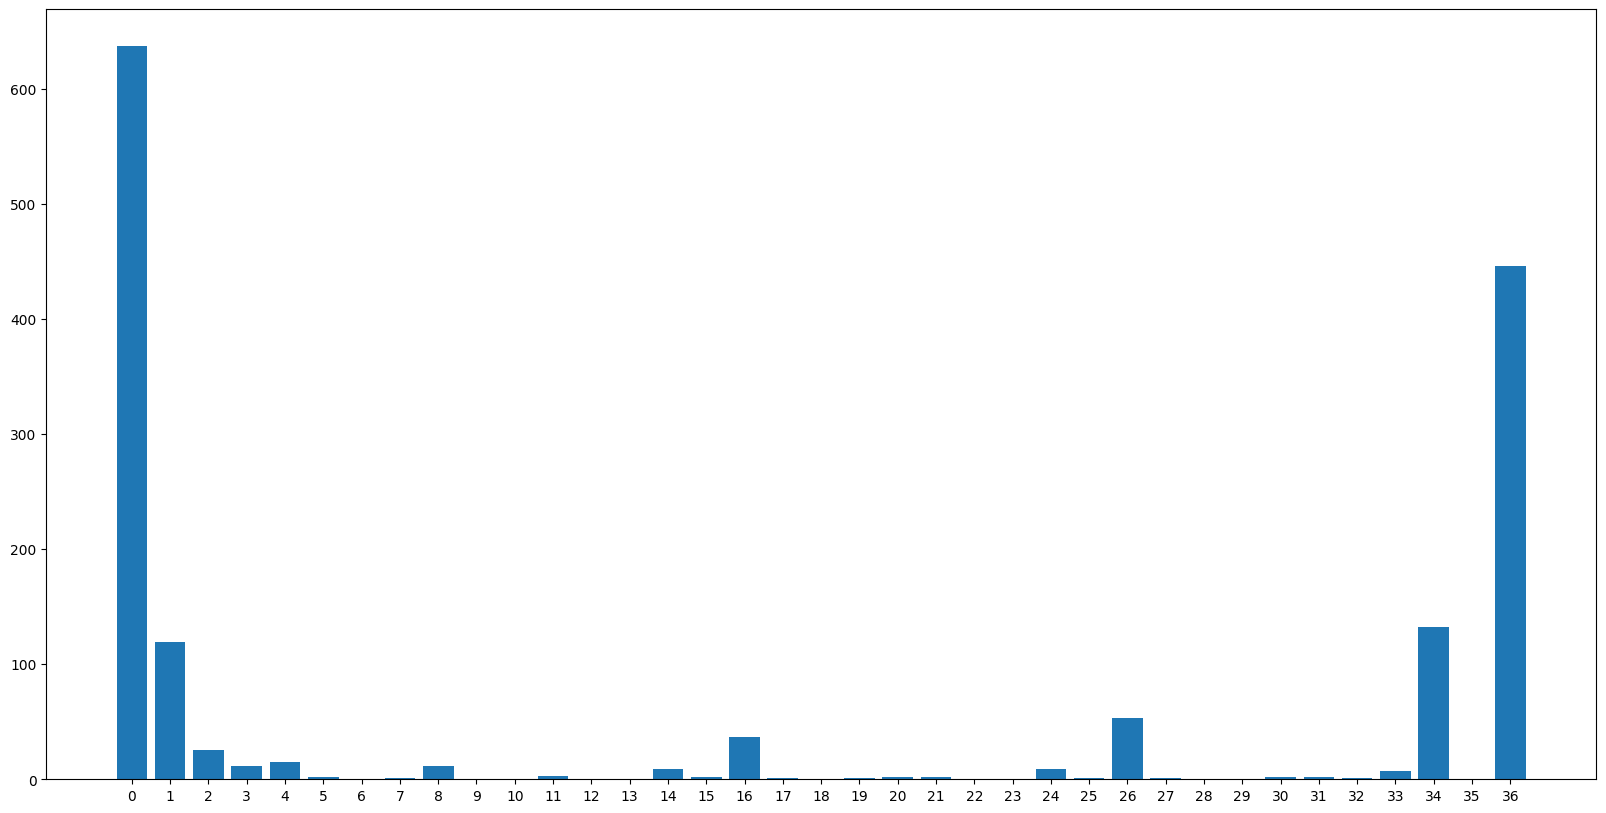

In [181]:
# plot the scores
plt.figure(figsize = (20, 10))
x = np.arange(0, 37, 1)
plt.bar([i for i in range(len(featureSelection.scores_))], featureSelection.scores_)
plt.xticks(x)
plt.show()

# 10.2 Summary

The regression models highlighted how the 'Years' independent variable (the year the vehicle was manufactured) was the more relevant attribute for predicting price, and generated significant scores. As shown in the simple regression analysis, newer vehicles generated higher prices, and older vehicles generated lower prices. While this is logical, the "Mileage" independent variable was not as relevant for predicting price. This was not the expected result, as generally newer vehicles have lower mileage, and older vehicles have higher mileage, and as such, would be a good proxy for the age of a vehicle, and correspondlingly, the price.

As shown in the simple regression analysis, pricing of used vehicles can be complex and not a linear function even for a predictive independent variable such as "Years". This was highlighted in the higher R2 scores for the 5-degree polynomial function.

Therefore, when using one-hot encoding to include categorical data in the mulitple regression analysis, the hightest R2 score of 0.894 was achieved.

As discussed in the introduction, the pricing of used vechicles, given the high volume of used vehicles sold annually even in one countries, should be transparent and 'efficient'. However, there are limitations to the efficient pricing, including:

- emotions of the seller, wanting the maximize monetary value, and emotions of the buyer, wanting to pay under-market
- the transactions are 'un-regulated' in the sense that the final price is determined by only two parties, the buyer and seller, and there are no 'rules' for this market
- despite the large volume of used vehicles sold annually, there are also a large number of models for each vehicle manufacturer, and many different features for each model, as highlighted for the U.S. dataset

All of these issues can cause prices to become 'inefficient' and become outliers to the dataset. As the scatterplots showed, there can be high variances for specific features, and many outliers.

**Finally, these models were based on 'list prices', not 'final prices'. As such, outliers may not exist with 'final prices' and variances could diminish, and model accuracy could improve.**

Based on the models being able to achieve high scores, with multiple quantitative independent variables as well as multiple categorical independent variables, I believe these models would be transferrable to other areas where a similar mix of quantitative and categorical independent variables exist.